In [8]:
import zipfile
import os

zip_path = "elyx_datasets.zip"
extract_dir = "elyx_datasets"

# Extract zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", extract_dir)
print(os.listdir(extract_dir))


Files extracted to: elyx_datasets
['elyx_datasets']


In [9]:
import pandas as pd
import json
import os

# Path to extracted folder
data_dir = "elyx_datasets/elyx_datasets"

# List of CSVs inside the dataset
csv_files = [
    "member_profile.csv",
    "member_daily_context.csv",
    "wearable_data.csv",
    "diagnostic_tests.csv",
    "interventions.csv",
    "intervention_adherence.csv",
    "events.csv",
    "communications.csv",
    "decisions.csv",
    "traceability.csv",
    "internal_metrics.csv"
]

# Convert each CSV to JSON
json_data = {}
for file in csv_files:
    path = os.path.join(data_dir, file)
    df = pd.read_csv(path)
    json_data[file.replace(".csv", "")] = df.to_dict(orient="records")

# Save combined JSON
with open("elyx_datasets.json", "w") as f:
    json.dump(json_data, f, indent=4)

print("Combined JSON saved as elyx_datasets.json")

Combined JSON saved as elyx_datasets.json


In [10]:
# Print small sample for checking
print(json.dumps(json_data["wearable_data"][:3], indent=2))


[
  {
    "member_id": "M001",
    "timestamp": "2025-01-01 06:46:38",
    "day_part": "wake",
    "resting_hr": 67,
    "hrv": 33.2,
    "steps": 1175,
    "stress_score": 66,
    "sleep_hours": 0.0,
    "vo2max": 37.4
  },
  {
    "member_id": "M001",
    "timestamp": "2025-01-01 12:18:49",
    "day_part": "noon",
    "resting_hr": 70,
    "hrv": 33.5,
    "steps": 791,
    "stress_score": 44,
    "sleep_hours": 0.09,
    "vo2max": 39.9
  },
  {
    "member_id": "M001",
    "timestamp": "2025-01-01 18:44:01",
    "day_part": "workout",
    "resting_hr": 74,
    "hrv": 29.3,
    "steps": 7168,
    "stress_score": 44,
    "sleep_hours": 0.04,
    "vo2max": 37.8
  }
]


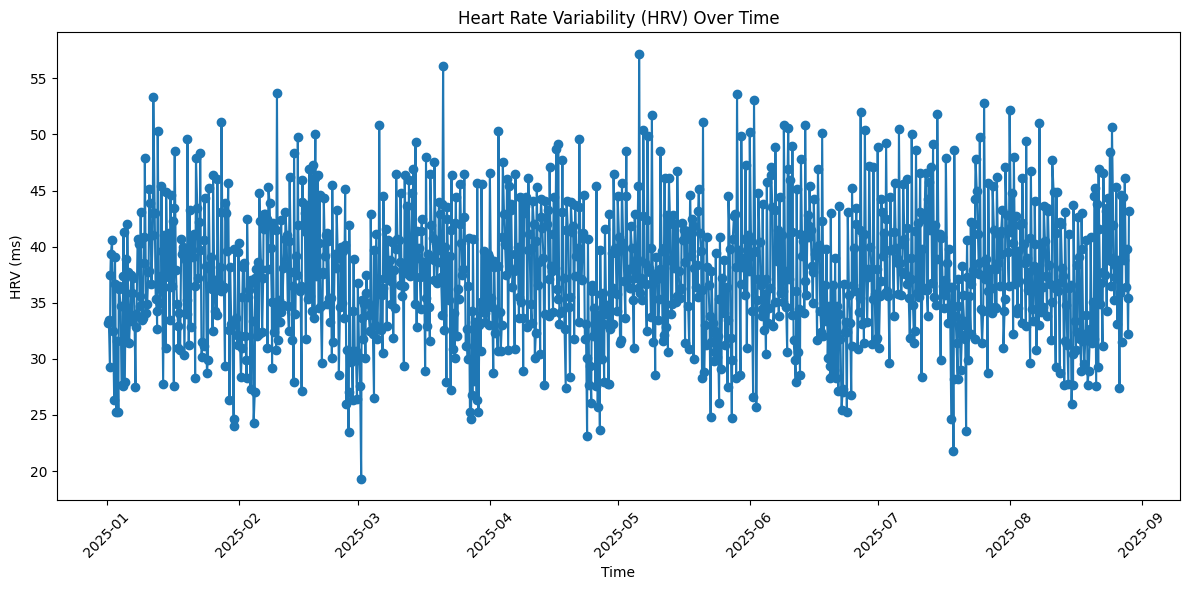

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load JSON (assuming you've already created elyx_datasets.json)
with open("elyx_datasets.json", "r") as f:
    data = json.load(f)

# Extract wearable data
wearable = pd.DataFrame(data["wearable_data"])

# Convert timestamp to datetime
wearable["timestamp"] = pd.to_datetime(wearable["timestamp"])

# Sort by time
wearable = wearable.sort_values("timestamp")

# ---- Plot HRV trend ----
plt.figure(figsize=(12,6))
plt.plot(wearable["timestamp"], wearable["hrv"], marker="o", linestyle="-")
plt.title("Heart Rate Variability (HRV) Over Time")
plt.xlabel("Time")
plt.ylabel("HRV (ms)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# Aggregate by day
wearable["date"] = wearable["timestamp"].dt.date
daily_summary = wearable.groupby("date").agg({
    "resting_hr": "mean",
    "hrv": "mean",
    "steps": "sum",
    "sleep_hours": "sum",
    "stress_score": "mean",
    "vo2max": "mean"
}).reset_index()

print(daily_summary.head())


         date  resting_hr    hrv  steps  sleep_hours  stress_score  vo2max
0  2025-01-01        70.4  34.56  10907         6.80          51.8   38.68
1  2025-01-02        70.0  35.04   8827         6.00          59.6   39.64
2  2025-01-03        70.8  30.98  10058         6.66          55.8   38.96
3  2025-01-04        69.4  33.74   7185         7.26          52.4   38.50
4  2025-01-05        71.6  35.60   5211         7.05          50.4   39.04


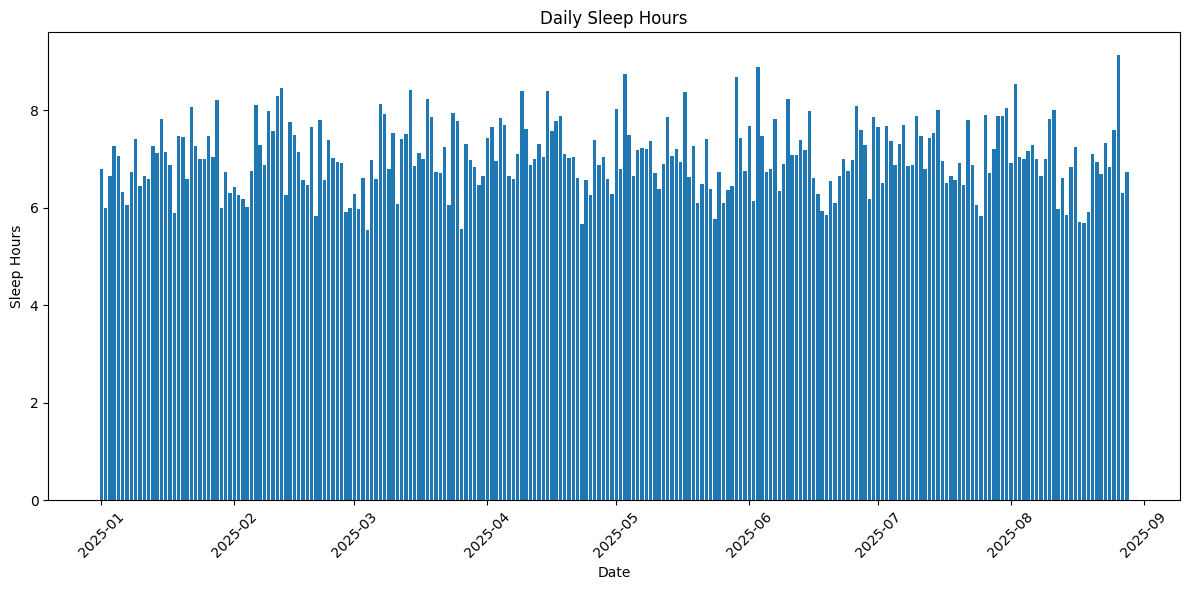

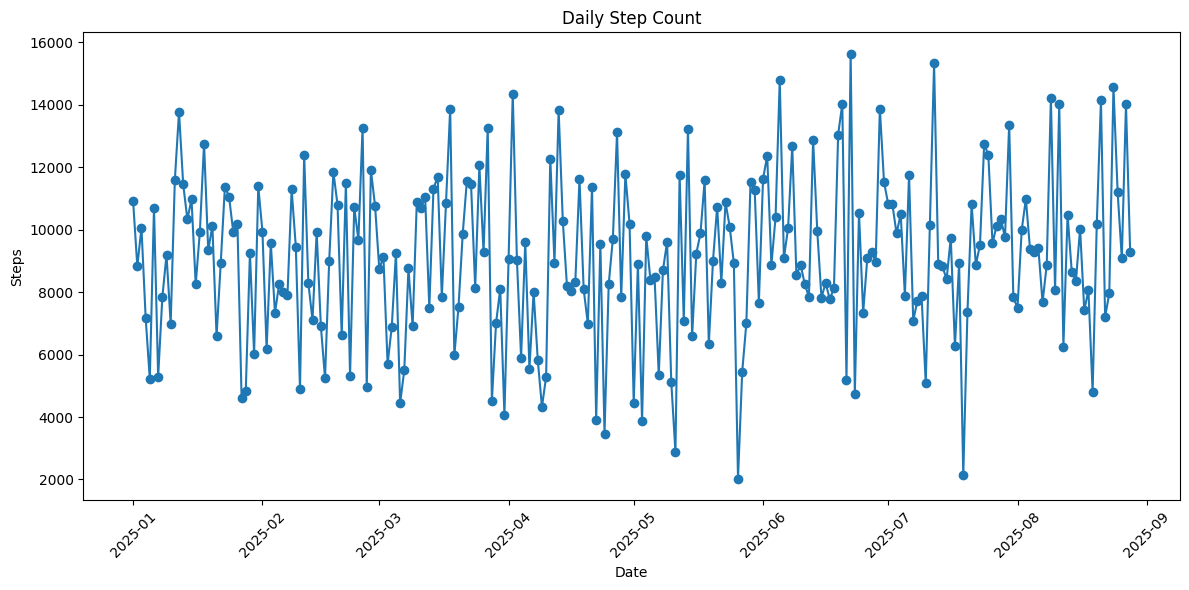

In [13]:
plt.figure(figsize=(12,6))
plt.bar(daily_summary["date"], daily_summary["sleep_hours"])
plt.title("Daily Sleep Hours")
plt.xlabel("Date")
plt.ylabel("Sleep Hours")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(daily_summary["date"], daily_summary["steps"], marker="o")
plt.title("Daily Step Count")
plt.xlabel("Date")
plt.ylabel("Steps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


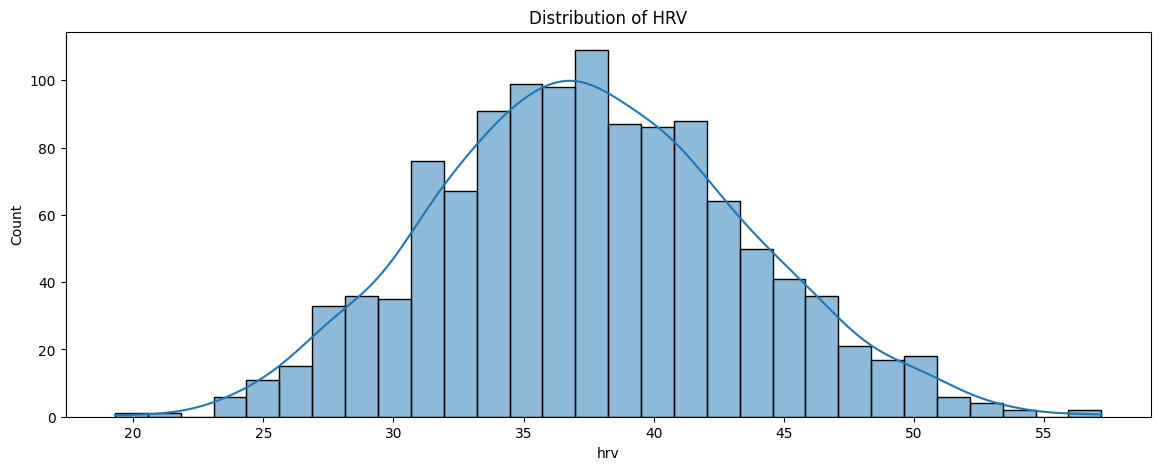

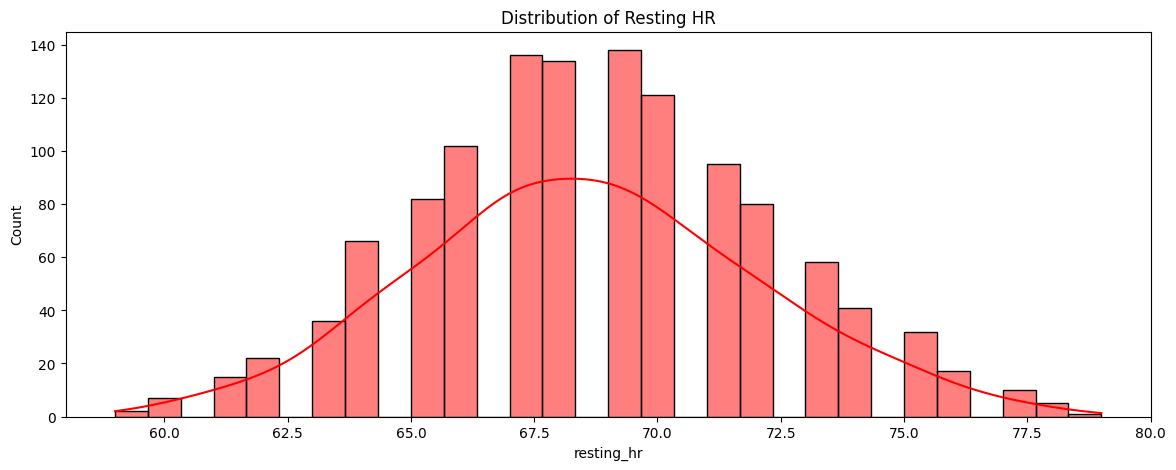

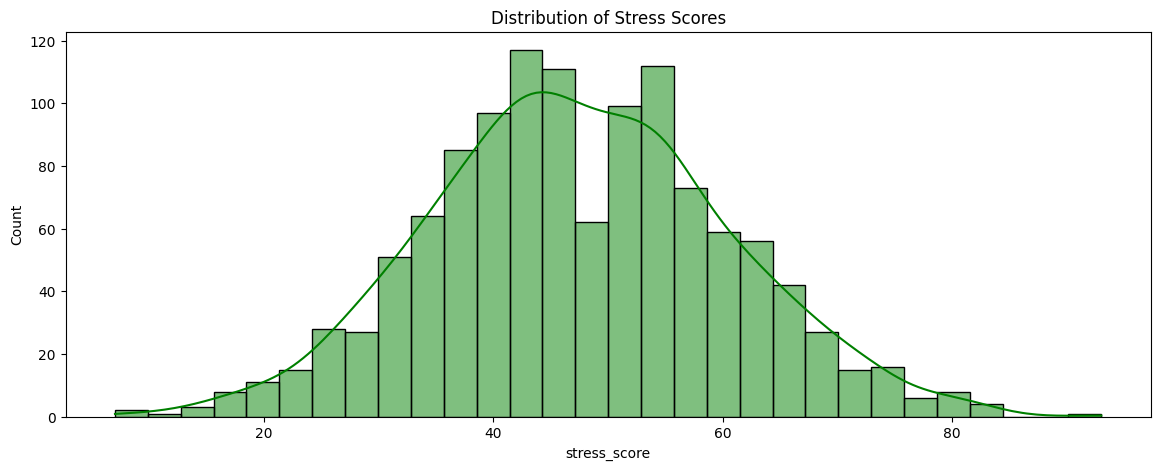

In [14]:
import seaborn as sns

plt.figure(figsize=(14,5))
sns.histplot(wearable["hrv"], kde=True, bins=30)
plt.title("Distribution of HRV")
plt.show()

plt.figure(figsize=(14,5))
sns.histplot(wearable["resting_hr"], kde=True, bins=30, color="red")
plt.title("Distribution of Resting HR")
plt.show()

plt.figure(figsize=(14,5))
sns.histplot(wearable["stress_score"], kde=True, bins=30, color="green")
plt.title("Distribution of Stress Scores")
plt.show()


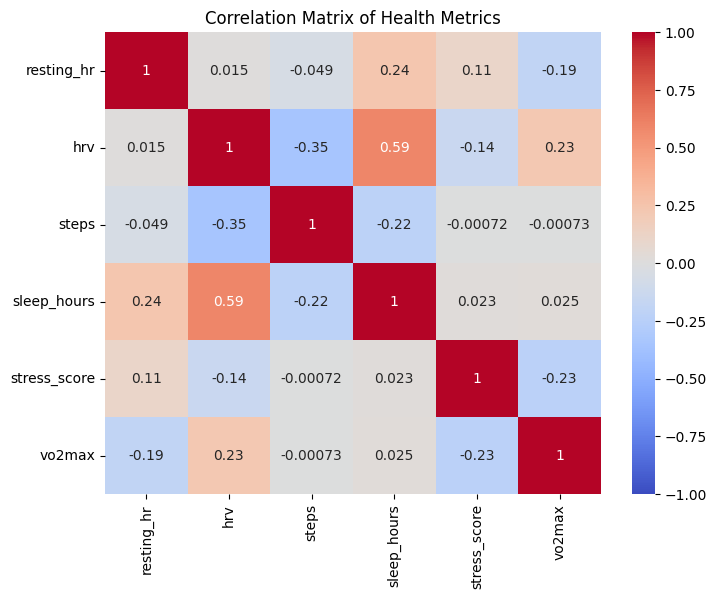

In [15]:
import numpy as np

corr = wearable[["resting_hr", "hrv", "steps", "sleep_hours", "stress_score", "vo2max"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Health Metrics")
plt.show()


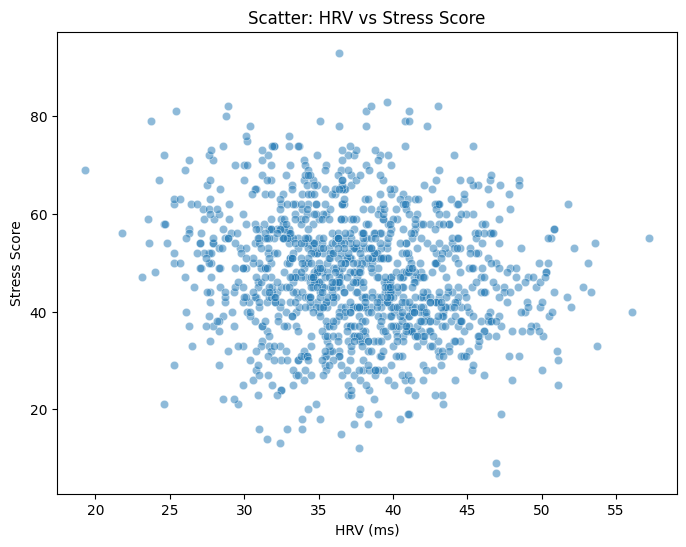

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=wearable, x="hrv", y="stress_score", alpha=0.5)
plt.title("Scatter: HRV vs Stress Score")
plt.xlabel("HRV (ms)")
plt.ylabel("Stress Score")
plt.show()


In [17]:
import statsmodels.api as sm

X = daily_summary["sleep_hours"]
y = daily_summary["steps"]

X = sm.add_constant(X)  # intercept
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  steps   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.07580
Date:                Tue, 19 Aug 2025   Prob (F-statistic):              0.783
Time:                        19:34:16   Log-Likelihood:                -2229.8
No. Observations:                 240   AIC:                             4464.
Df Residuals:                     238   BIC:                             4471.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8642.8663   1728.253      5.001      

In [18]:
print("Descriptive Statistics:\n", wearable.describe())


Descriptive Statistics:
                            timestamp   resting_hr          hrv         steps  \
count                           1200  1200.000000  1200.000000   1200.000000   
mean   2025-05-01 04:18:17.290833408    68.575833    37.535000   1823.273333   
min              2025-01-01 06:46:38    59.000000    19.300000      0.000000   
25%              2025-03-02 05:10:54    66.000000    33.400000    538.750000   
50%       2025-05-01 02:46:29.500000    68.000000    37.300000    959.000000   
75%              2025-06-30 01:29:17    71.000000    41.400000   1551.250000   
max              2025-08-28 23:25:23    79.000000    57.200000  12346.000000   
std                              NaN     3.507064     5.902157   2349.796084   

       stress_score  sleep_hours       vo2max  
count   1200.000000  1200.000000  1200.000000  
mean      47.460000     1.407342    40.457667  
min        7.000000     0.000000    35.500000  
25%       39.000000     0.000000    39.500000  
50%       47.0

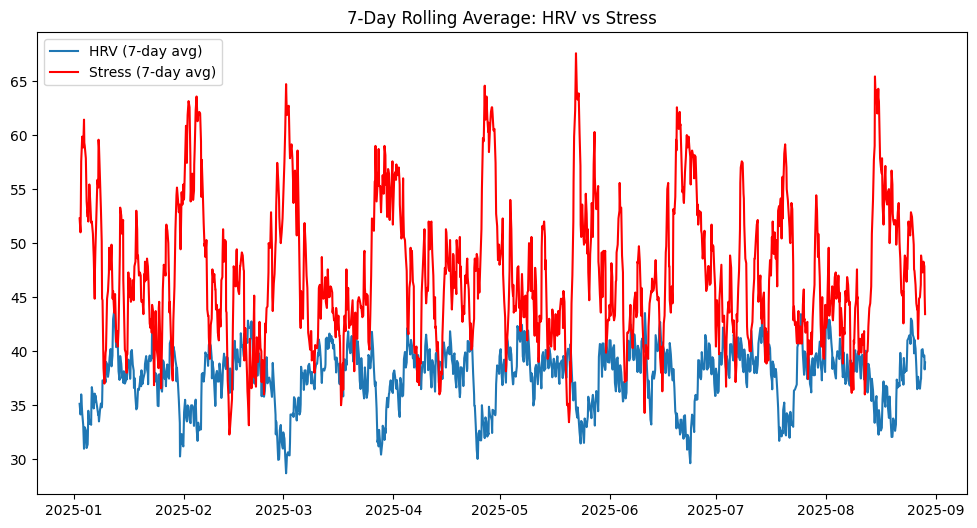

In [19]:
wearable["hrv_rolling"] = wearable["hrv"].rolling(7).mean()
wearable["stress_rolling"] = wearable["stress_score"].rolling(7).mean()

plt.figure(figsize=(12,6))
plt.plot(wearable["timestamp"], wearable["hrv_rolling"], label="HRV (7-day avg)")
plt.plot(wearable["timestamp"], wearable["stress_rolling"], label="Stress (7-day avg)", color="red")
plt.title("7-Day Rolling Average: HRV vs Stress")
plt.legend()
plt.show()


In [20]:
q1 = wearable["stress_score"].quantile(0.25)
q3 = wearable["stress_score"].quantile(0.75)
iqr = q3 - q1

outliers = wearable[ (wearable["stress_score"] < (q1 - 1.5*iqr)) |
                     (wearable["stress_score"] > (q3 + 1.5*iqr)) ]

print("Stress Outliers Detected:", len(outliers))
print(outliers[["timestamp","stress_score"]].head())


Stress Outliers Detected: 9
              timestamp  stress_score
239 2025-02-17 23:30:03             9
253 2025-02-20 20:36:32            12
441 2025-03-30 12:36:57            83
798 2025-06-09 20:43:56             7
837 2025-06-17 18:24:25            13


In [21]:
# Load events & interventions
events = pd.DataFrame(data["events"])
interventions = pd.DataFrame(data["interventions"])

# Convert date columns
events["timestamp"] = pd.to_datetime(events["timestamp"])
interventions["start_date"] = pd.to_datetime(interventions["start_date"])
interventions["end_date"] = pd.to_datetime(interventions["end_date"])

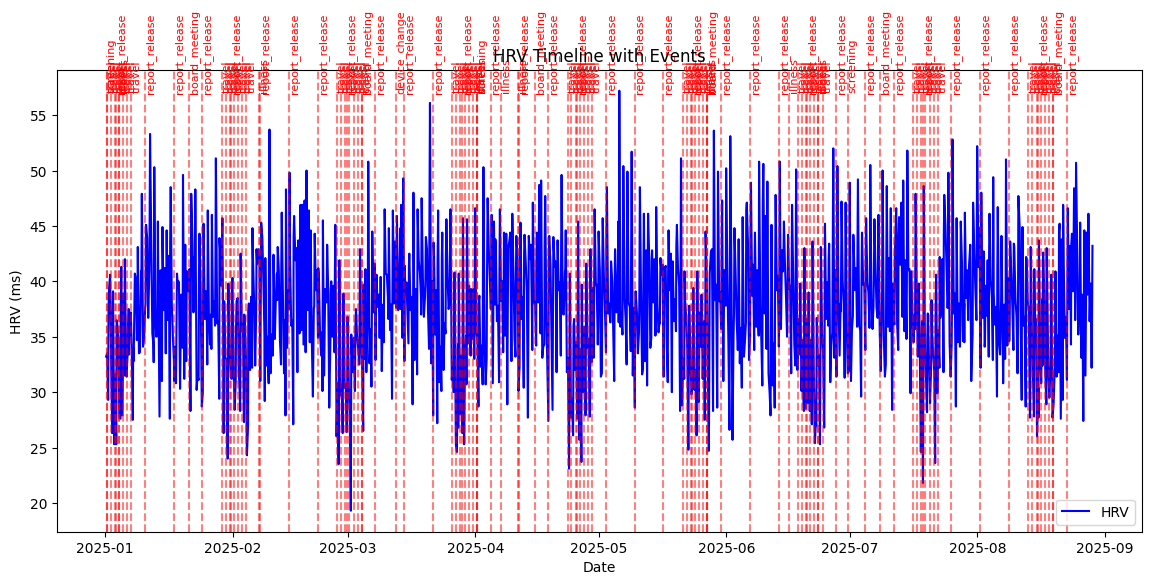

In [22]:
plt.figure(figsize=(14,6))

# HRV trend
plt.plot(wearable["timestamp"], wearable["hrv"], label="HRV", color="blue")

# Overlay events (Travel, Illness, Stressful events, etc.)
for _, row in events.iterrows():
    plt.axvline(row["timestamp"], color="red", linestyle="--", alpha=0.5)
    plt.text(row["timestamp"], wearable["hrv"].max(), row["type"], rotation=90, fontsize=8, color="red")

plt.title("HRV Timeline with Events")
plt.xlabel("Date")
plt.ylabel("HRV (ms)")
plt.legend()
plt.show()

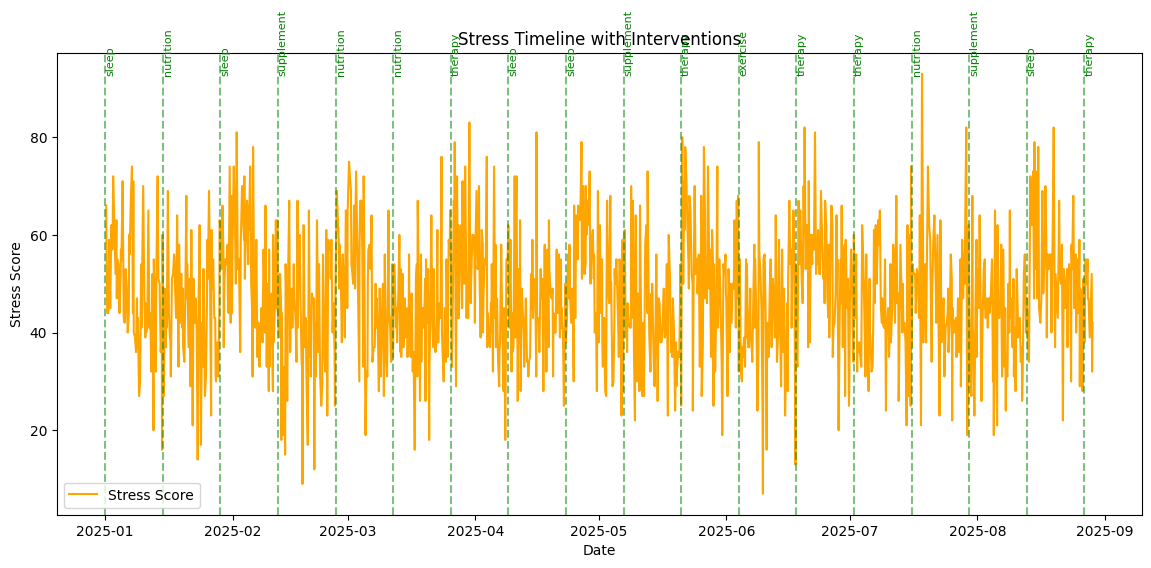

Intervention: sleep on 2025-01-01
Avg Stress (7 days before): nan
Avg Stress (7 days after): 54.17

Intervention Effectiveness Summary (HRV):
   intervention       date  HRV_before  HRV_after     Δ_HRV
0         sleep 2025-01-01         NaN  33.900000       NaN
1     nutrition 2025-01-15   39.074286  37.760000 -1.314286
2         sleep 2025-01-29   38.337143  33.785714 -4.551429
3    supplement 2025-02-12   38.202857  39.662857  1.460000
4     nutrition 2025-02-26   37.994286  32.062857 -5.931429
5     nutrition 2025-03-12   38.080000  39.505714  1.425714
6       therapy 2025-03-26   39.057143  34.451429 -4.605714
7         sleep 2025-04-09   38.500000  39.085714  0.585714
8         sleep 2025-04-23   39.108571  33.417143 -5.691429
9    supplement 2025-05-07   39.448571  38.400000 -1.048571
10      therapy 2025-05-21   38.780000  33.742857 -5.037143
11     exercise 2025-06-04   38.982857  39.660000  0.677143
12      therapy 2025-06-18   38.680000  33.151429 -5.528571
13      therapy 20

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1. Load datasets
# ---------------------------
base_path = "/content/elyx_datasets/elyx_datasets"

wearable = pd.read_csv(f"{base_path}/wearable_data.csv")
interventions = pd.read_csv(f"{base_path}/interventions.csv")

# Convert dates
wearable["timestamp"] = pd.to_datetime(wearable["timestamp"])
interventions["start_date"] = pd.to_datetime(interventions["start_date"])

# ---------------------------
# 2. Stress timeline with interventions
# ---------------------------
plt.figure(figsize=(14,6))
plt.plot(wearable["timestamp"], wearable["stress_score"], label="Stress Score", color="orange")

# Overlay interventions
for _, row in interventions.iterrows():
    plt.axvline(row["start_date"], color="green", linestyle="--", alpha=0.5)
    plt.text(row["start_date"], wearable["stress_score"].max(),
             row["type"], rotation=90, fontsize=8, color="green")

plt.title("Stress Timeline with Interventions")
plt.xlabel("Date")
plt.ylabel("Stress Score")
plt.legend()
plt.show()

# ---------------------------
# 3. Before/After analysis (Stress)
# ---------------------------
chosen = interventions.iloc[0]  # first intervention
chosen_date = chosen["start_date"]

before = wearable[(wearable["timestamp"] < chosen_date) &
                  (wearable["timestamp"] >= chosen_date - pd.Timedelta(days=7))]["stress_score"].mean()
after = wearable[(wearable["timestamp"] >= chosen_date) &
                 (wearable["timestamp"] <= chosen_date + pd.Timedelta(days=7))]["stress_score"].mean()

print(f"Intervention: {chosen['type']} on {chosen_date.date()}")
print(f"Avg Stress (7 days before): {before:.2f}")
print(f"Avg Stress (7 days after): {after:.2f}")

# ---------------------------
# 4. Multiple Interventions Impact (HRV)
# ---------------------------
results = []
for _, row in interventions.iterrows():
    date = row["start_date"]
    before = wearable[(wearable["timestamp"] < date) &
                      (wearable["timestamp"] >= date - pd.Timedelta(days=7))]["hrv"].mean()
    after = wearable[(wearable["timestamp"] >= date) &
                     (wearable["timestamp"] <= date + pd.Timedelta(days=7))]["hrv"].mean()
    results.append({
        "intervention": row["type"],
        "date": date,
        "HRV_before": before,
        "HRV_after": after,
        "Δ_HRV": after - before
    })

impact_df = pd.DataFrame(results)
print("\nIntervention Effectiveness Summary (HRV):")
print(impact_df)

# ---------------------------
# 5. Basic Statistical Analysis
# ---------------------------
print("\nDescriptive Stats for Wearable Data:")
print(wearable[["hrv","resting_hr","stress_score","sleep_hours","steps","vo2max"]].describe())

print("\nCorrelation Matrix:")
print(wearable[["hrv","resting_hr","stress_score","sleep_hours","steps","vo2max"]].corr())

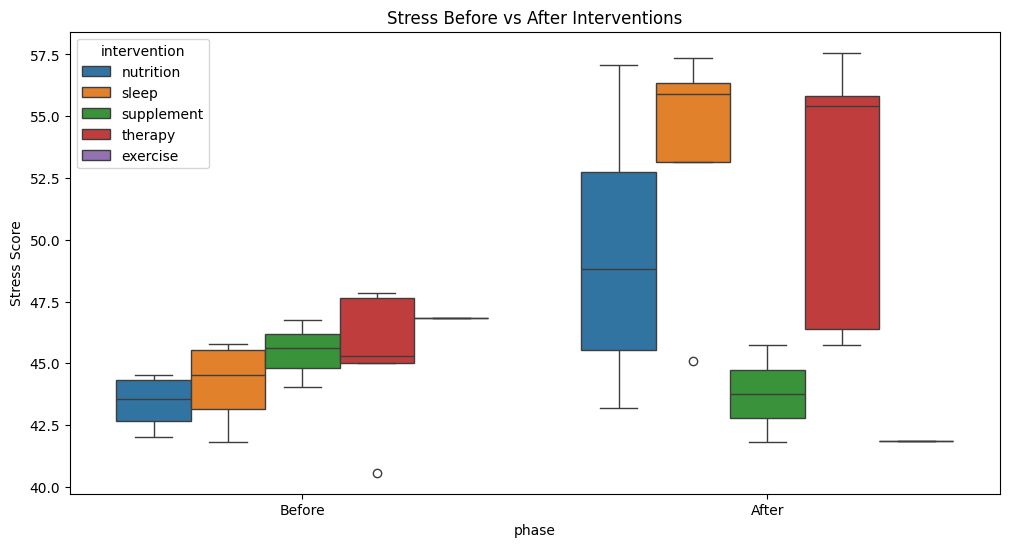

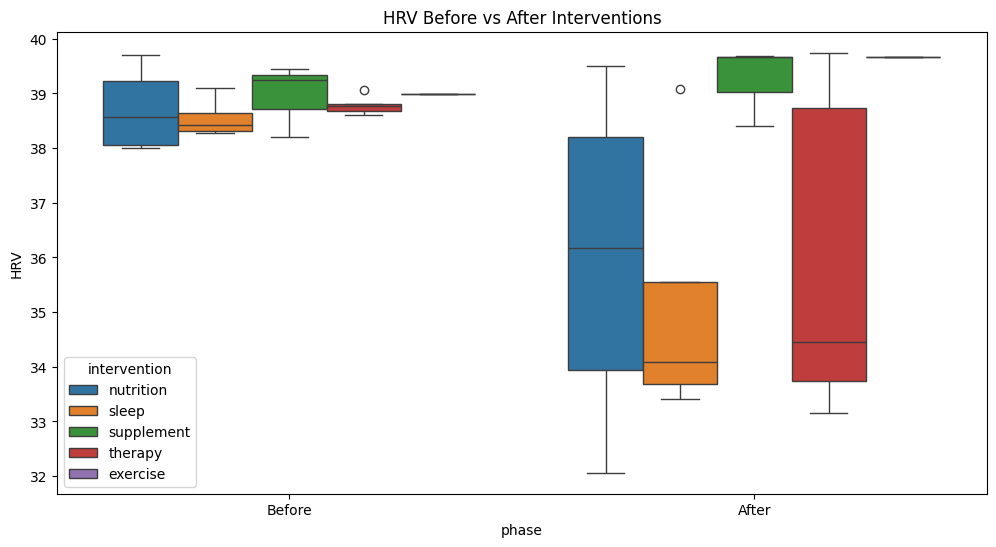

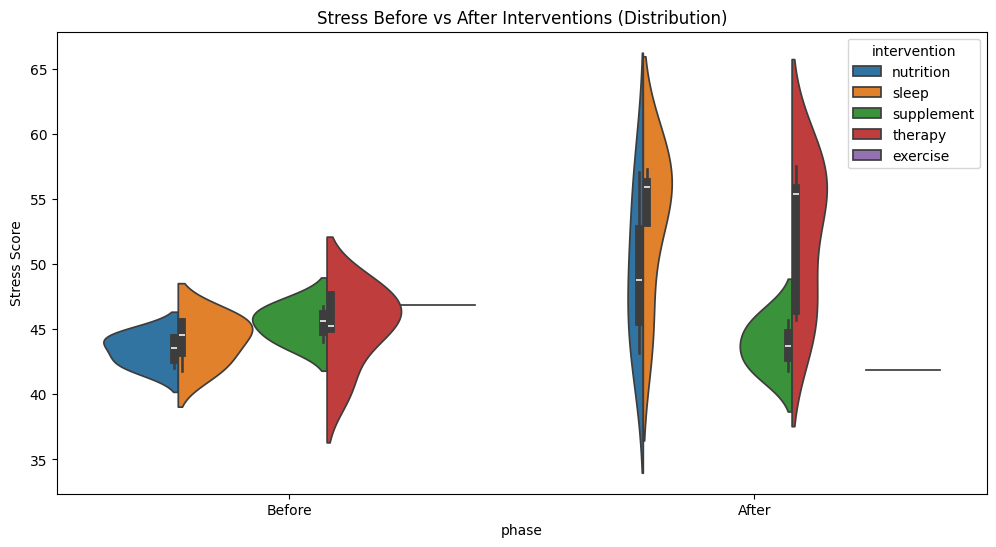

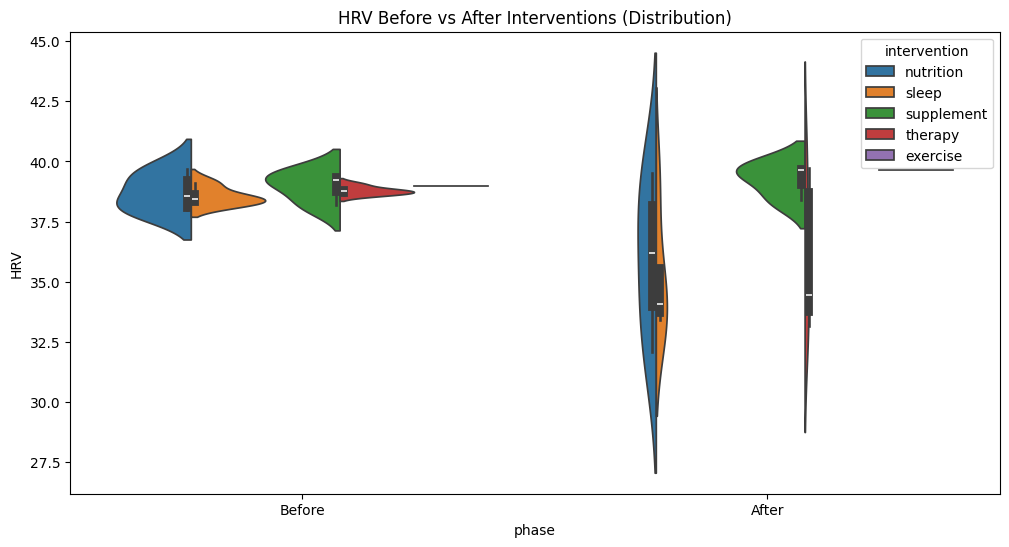

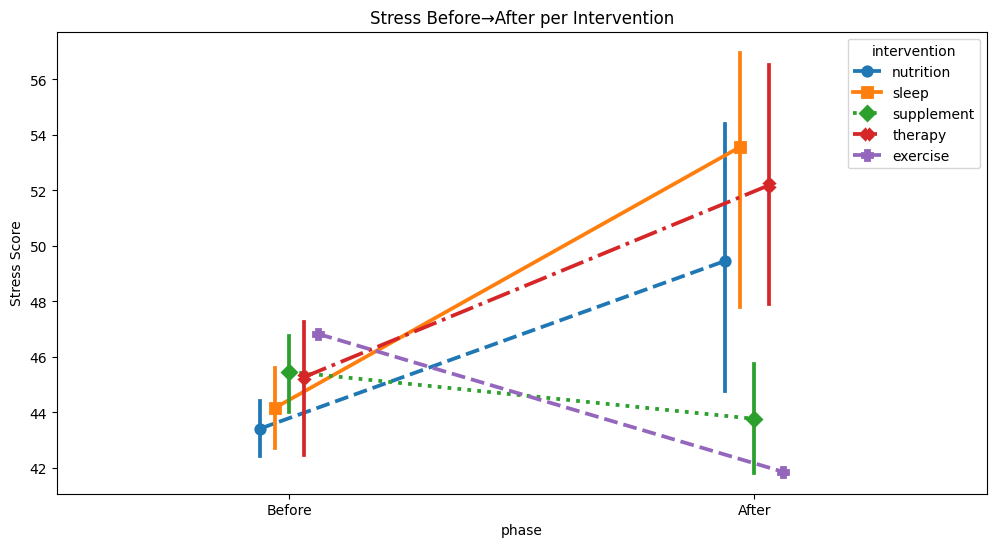

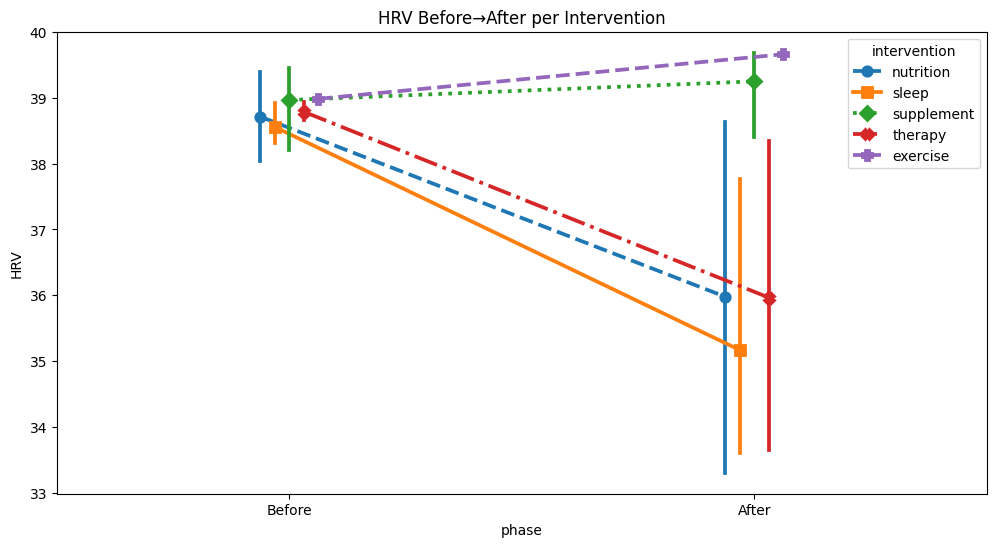

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Load Data
# -----------------------------
base_path = "/content/elyx_datasets/elyx_datasets"

wearable = pd.read_csv(f"{base_path}/wearable_data.csv")
interventions = pd.read_csv(f"{base_path}/interventions.csv")

wearable["timestamp"] = pd.to_datetime(wearable["timestamp"])
interventions["start_date"] = pd.to_datetime(interventions["start_date"])

# -----------------------------
# Prepare Before/After dataset
# -----------------------------
records = []
for _, row in interventions.iterrows():
    date = row["start_date"]
    itype = row["type"]

    # Stress
    before_stress = wearable[(wearable["timestamp"] < date) &
                             (wearable["timestamp"] >= date - pd.Timedelta(days=7))]["stress_score"].mean()
    after_stress = wearable[(wearable["timestamp"] >= date) &
                            (wearable["timestamp"] <= date + pd.Timedelta(days=7))]["stress_score"].mean()

    # HRV
    before_hrv = wearable[(wearable["timestamp"] < date) &
                          (wearable["timestamp"] >= date - pd.Timedelta(days=7))]["hrv"].mean()
    after_hrv = wearable[(wearable["timestamp"] >= date) &
                         (wearable["timestamp"] <= date + pd.Timedelta(days=7))]["hrv"].mean()

    # Store values if valid
    if not pd.isna(before_stress) and not pd.isna(after_stress):
        records.append({"intervention": itype, "metric": "Stress", "phase": "Before", "value": before_stress})
        records.append({"intervention": itype, "metric": "Stress", "phase": "After", "value": after_stress})

    if not pd.isna(before_hrv) and not pd.isna(after_hrv):
        records.append({"intervention": itype, "metric": "HRV", "phase": "Before", "value": before_hrv})
        records.append({"intervention": itype, "metric": "HRV", "phase": "After", "value": after_hrv})

viz_df = pd.DataFrame(records)

# -----------------------------
# Boxplots
# -----------------------------
plt.figure(figsize=(12,6))
sns.boxplot(data=viz_df[viz_df["metric"]=="Stress"], x="phase", y="value", hue="intervention")
plt.title("Stress Before vs After Interventions")
plt.ylabel("Stress Score")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=viz_df[viz_df["metric"]=="HRV"], x="phase", y="value", hue="intervention")
plt.title("HRV Before vs After Interventions")
plt.ylabel("HRV")
plt.show()

# -----------------------------
# Violin Plots
# -----------------------------
plt.figure(figsize=(12,6))
sns.violinplot(data=viz_df[viz_df["metric"]=="Stress"], x="phase", y="value", hue="intervention", split=True)
plt.title("Stress Before vs After Interventions (Distribution)")
plt.ylabel("Stress Score")
plt.show()

plt.figure(figsize=(12,6))
sns.violinplot(data=viz_df[viz_df["metric"]=="HRV"], x="phase", y="value", hue="intervention", split=True)
plt.title("HRV Before vs After Interventions (Distribution)")
plt.ylabel("HRV")
plt.show()

# -----------------------------
# Paired Line Plots
# -----------------------------
interventions_list = viz_df["intervention"].unique()
markers = ["o", "s", "D", "X", "P", "H", "*", "+", "v", "^", "<", ">"] # Provide enough markers for all interventions
linestyles = ["--", "-", ":", "-.", "--", "-", ":", "-.", "--", "-", ":", "-."] # Provide enough linestyles

plt.figure(figsize=(12,6))
sns.pointplot(data=viz_df[viz_df["metric"]=="Stress"], x="phase", y="value", hue="intervention",
              dodge=True, markers=markers[:len(interventions_list)], linestyles=linestyles[:len(interventions_list)], hue_order=interventions_list)
plt.title("Stress Before→After per Intervention")
plt.ylabel("Stress Score")
plt.show()

plt.figure(figsize=(12,6))
sns.pointplot(data=viz_df[viz_df["metric"]=="HRV"], x="phase", y="value", hue="intervention",
              dodge=True, markers=markers[:len(interventions_list)], linestyles=linestyles[:len(interventions_list)], hue_order=interventions_list)
plt.title("HRV Before→After per Intervention")
plt.ylabel("HRV")
plt.show()

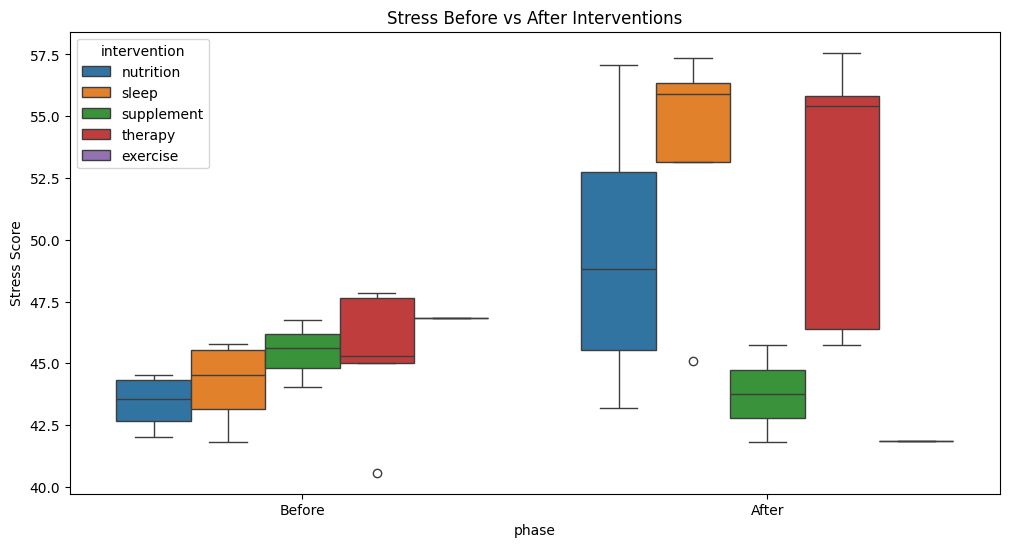

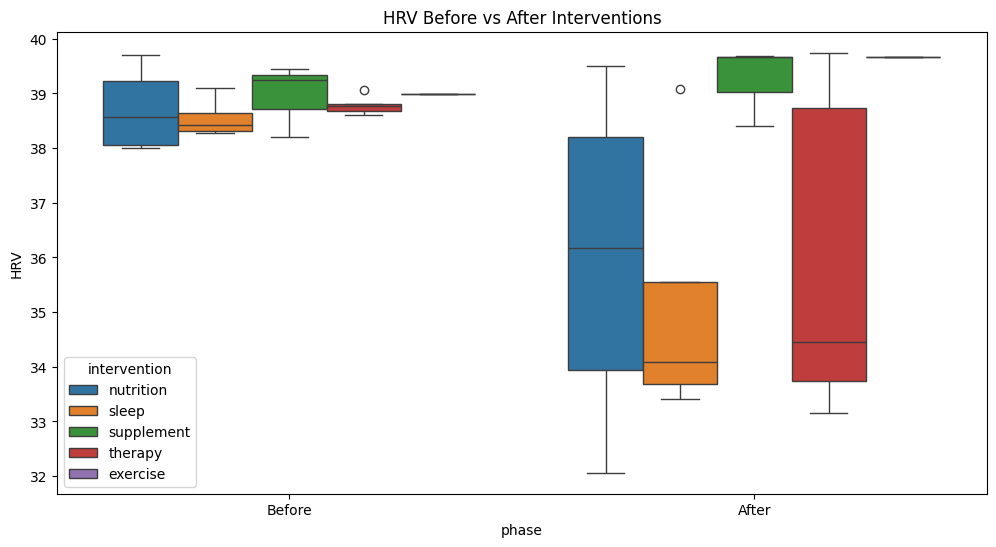

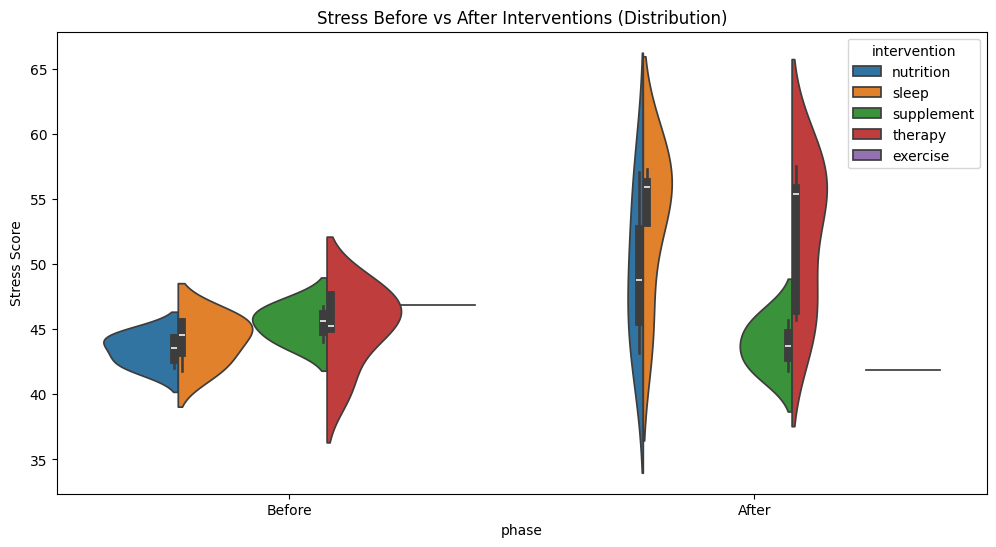

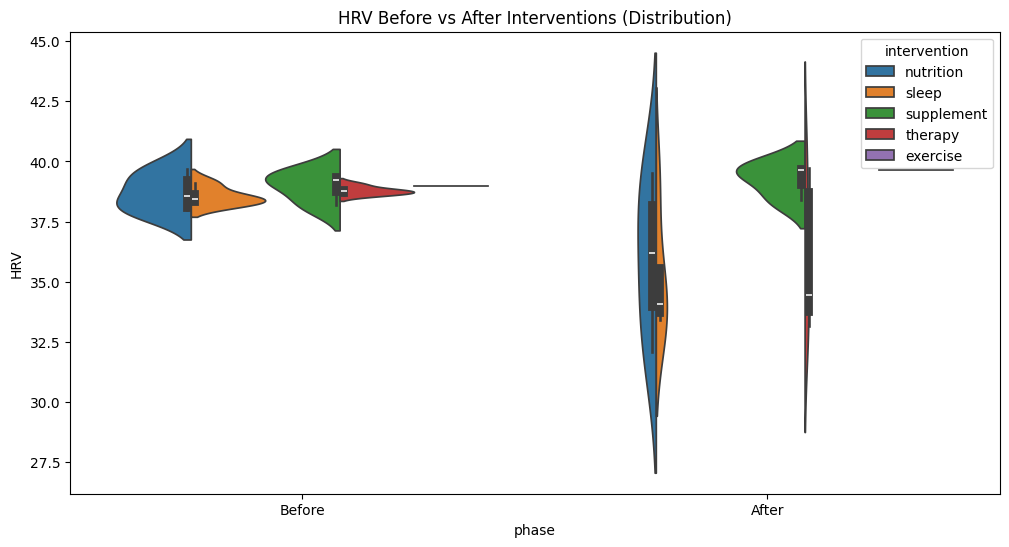

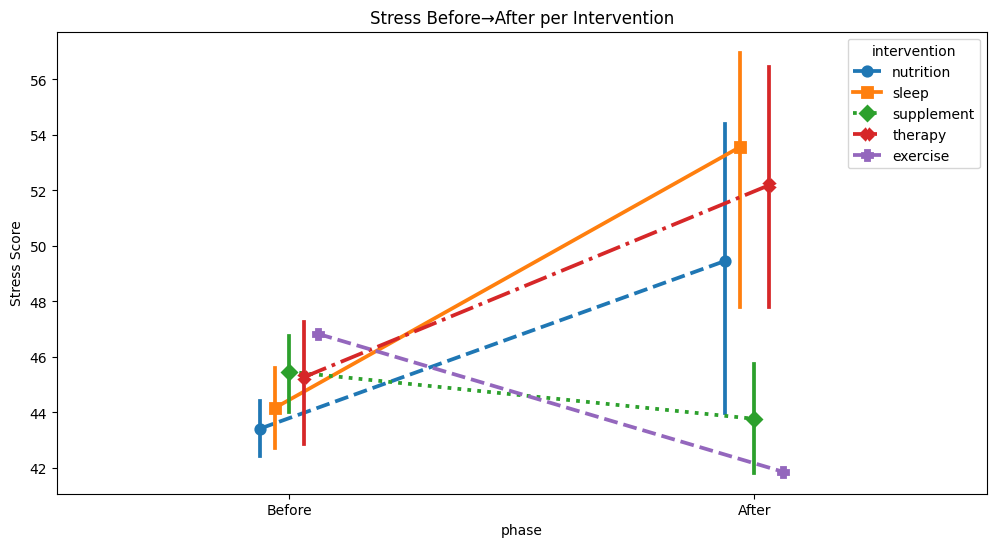

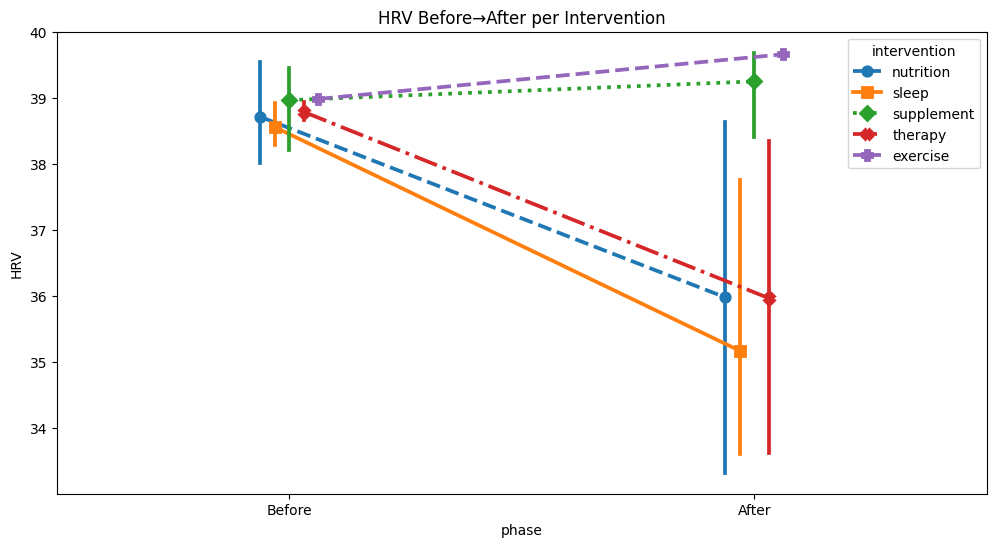

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Load Data
# -----------------------------
base_path = "/content/elyx_datasets/elyx_datasets"

wearable = pd.read_csv(f"{base_path}/wearable_data.csv")
interventions = pd.read_csv(f"{base_path}/interventions.csv")

wearable["timestamp"] = pd.to_datetime(wearable["timestamp"])
interventions["start_date"] = pd.to_datetime(interventions["start_date"])

# -----------------------------
# Prepare Before/After dataset
# -----------------------------
records = []
for _, row in interventions.iterrows():
    date = row["start_date"]
    itype = row["type"]

    # Stress
    before_stress = wearable[(wearable["timestamp"] < date) &
                             (wearable["timestamp"] >= date - pd.Timedelta(days=7))]["stress_score"].mean()
    after_stress = wearable[(wearable["timestamp"] >= date) &
                            (wearable["timestamp"] <= date + pd.Timedelta(days=7))]["stress_score"].mean()

    # HRV
    before_hrv = wearable[(wearable["timestamp"] < date) &
                          (wearable["timestamp"] >= date - pd.Timedelta(days=7))]["hrv"].mean()
    after_hrv = wearable[(wearable["timestamp"] >= date) &
                         (wearable["timestamp"] <= date + pd.Timedelta(days=7))]["hrv"].mean()

    # Store values if valid
    if not pd.isna(before_stress) and not pd.isna(after_stress):
        records.append({"intervention": itype, "metric": "Stress", "phase": "Before", "value": before_stress})
        records.append({"intervention": itype, "metric": "Stress", "phase": "After", "value": after_stress})

    if not pd.isna(before_hrv) and not pd.isna(after_hrv):
        records.append({"intervention": itype, "metric": "HRV", "phase": "Before", "value": before_hrv})
        records.append({"intervention": itype, "metric": "HRV", "phase": "After", "value": after_hrv})

viz_df = pd.DataFrame(records)

# -----------------------------
# Boxplots
# -----------------------------
plt.figure(figsize=(12,6))
sns.boxplot(data=viz_df[viz_df["metric"]=="Stress"], x="phase", y="value", hue="intervention")
plt.title("Stress Before vs After Interventions")
plt.ylabel("Stress Score")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=viz_df[viz_df["metric"]=="HRV"], x="phase", y="value", hue="intervention")
plt.title("HRV Before vs After Interventions")
plt.ylabel("HRV")
plt.show()

# -----------------------------
# Violin Plots
# -----------------------------
plt.figure(figsize=(12,6))
sns.violinplot(data=viz_df[viz_df["metric"]=="Stress"], x="phase", y="value", hue="intervention", split=True)
plt.title("Stress Before vs After Interventions (Distribution)")
plt.ylabel("Stress Score")
plt.show()

plt.figure(figsize=(12,6))
sns.violinplot(data=viz_df[viz_df["metric"]=="HRV"], x="phase", y="value", hue="intervention", split=True)
plt.title("HRV Before vs After Interventions (Distribution)")
plt.ylabel("HRV")
plt.show()

# -----------------------------
# Paired Line Plots
# -----------------------------
interventions_list = viz_df["intervention"].unique()
markers = ["o", "s", "D", "X", "P", "H", "*", "+", "v", "^", "<", ">"] # Provide enough markers for all interventions
linestyles = ["--", "-", ":", "-.", "--", "-", ":", "-.", "--", "-", ":", "-."] # Provide enough linestyles

plt.figure(figsize=(12,6))
sns.pointplot(data=viz_df[viz_df["metric"]=="Stress"], x="phase", y="value", hue="intervention",
              dodge=True, markers=markers[:len(interventions_list)], linestyles=linestyles[:len(interventions_list)], hue_order=interventions_list)
plt.title("Stress Before→After per Intervention")
plt.ylabel("Stress Score")
plt.show()

plt.figure(figsize=(12,6))
sns.pointplot(data=viz_df[viz_df["metric"]=="HRV"], x="phase", y="value", hue="intervention",
              dodge=True, markers=markers[:len(interventions_list)], linestyles=linestyles[:len(interventions_list)], hue_order=interventions_list)
plt.title("HRV Before→After per Intervention")
plt.ylabel("HRV")
plt.show()

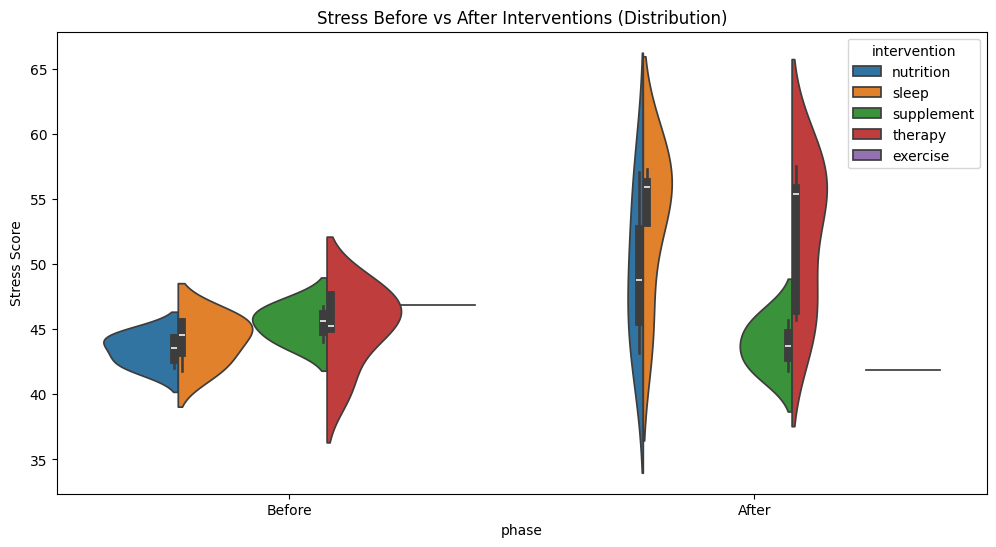

In [26]:
plt.figure(figsize=(12,6))
sns.violinplot(
    data=viz_df[viz_df["metric"]=="Stress"],
    x="phase", y="value", hue="intervention",
    split=True
)
plt.title("Stress Before vs After Interventions (Distribution)")
plt.ylabel("Stress Score")
plt.show()


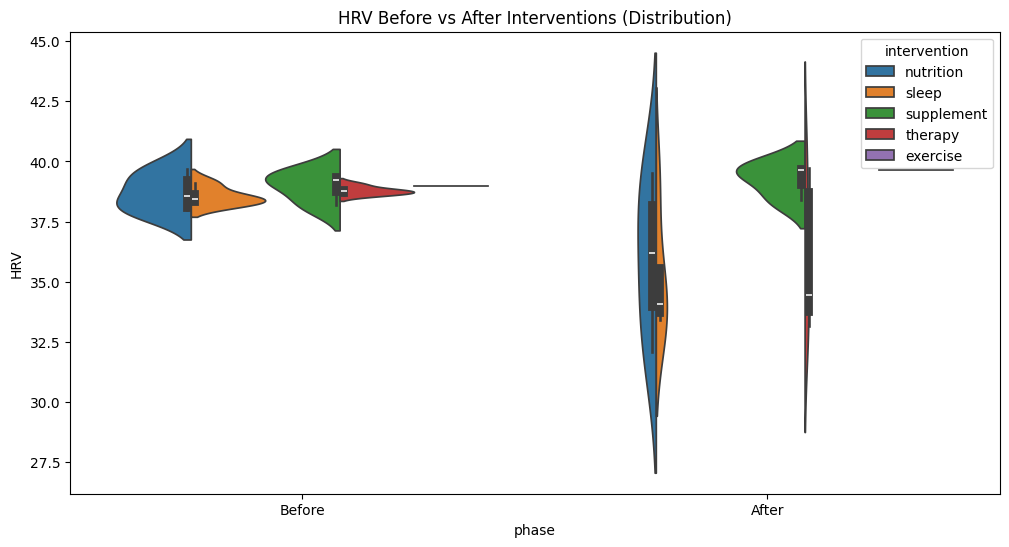

In [27]:
plt.figure(figsize=(12,6))
sns.violinplot(
    data=viz_df[viz_df["metric"]=="HRV"],
    x="phase", y="value", hue="intervention",
    split=True
)
plt.title("HRV Before vs After Interventions (Distribution)")
plt.ylabel("HRV")
plt.show()


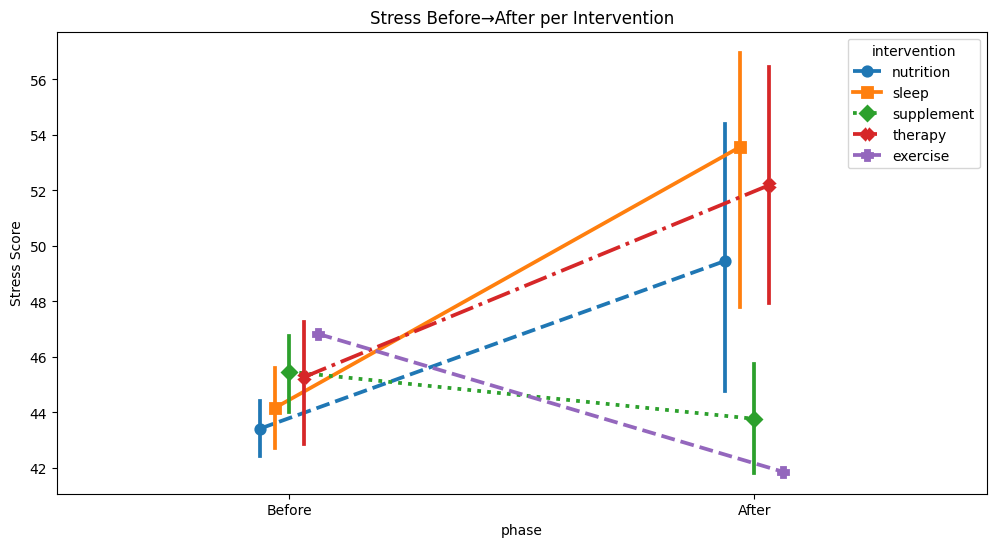

In [28]:
plt.figure(figsize=(12,6))
interventions_list = viz_df["intervention"].unique()
markers = ["o", "s", "D", "X", "P", "H", "*", "+", "v", "^", "<", ">"] # Provide enough markers for all interventions
linestyles = ["--", "-", ":", "-.", "--", "-", ":", "-.", "--", "-", ":", "-."] # Provide enough linestyles
sns.pointplot(
    data=viz_df[viz_df["metric"]=="Stress"],
    x="phase", y="value", hue="intervention",
    dodge=True, markers=markers[:len(interventions_list)], linestyles=linestyles[:len(interventions_list)], hue_order=interventions_list
)
plt.title("Stress Before→After per Intervention")
plt.ylabel("Stress Score")
plt.show()

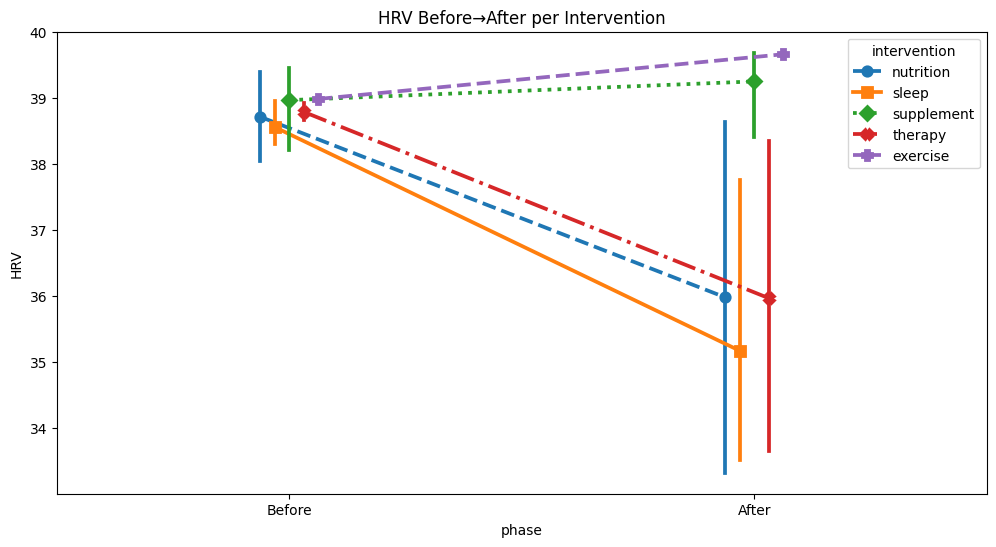

In [29]:
plt.figure(figsize=(12,6))
interventions_list = viz_df["intervention"].unique()
markers = ["o", "s", "D", "X", "P", "H", "*", "+", "v", "^", "<", ">"] # Provide enough markers for all interventions
linestyles = ["--", "-", ":", "-.", "--", "-", ":", "-.", "--", "-", ":", "-."] # Provide enough linestyles
sns.pointplot(
    data=viz_df[viz_df["metric"]=="HRV"],
    x="phase", y="value", hue="intervention",
    dodge=True, markers=markers[:len(interventions_list)], linestyles=linestyles[:len(interventions_list)], hue_order=interventions_list
)
plt.title("HRV Before→After per Intervention")
plt.ylabel("HRV")
plt.show()

/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:1243: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:1243: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Stress p-values: [('nutrition', np.float64(0.16755947267760354)), ('sleep', np.float64(0.07311522155208491)), ('supplement', np.float64(0.4071999468463151)), ('therapy', np.float64(0.12754234840835313)), ('exercise', np.float64(nan))]


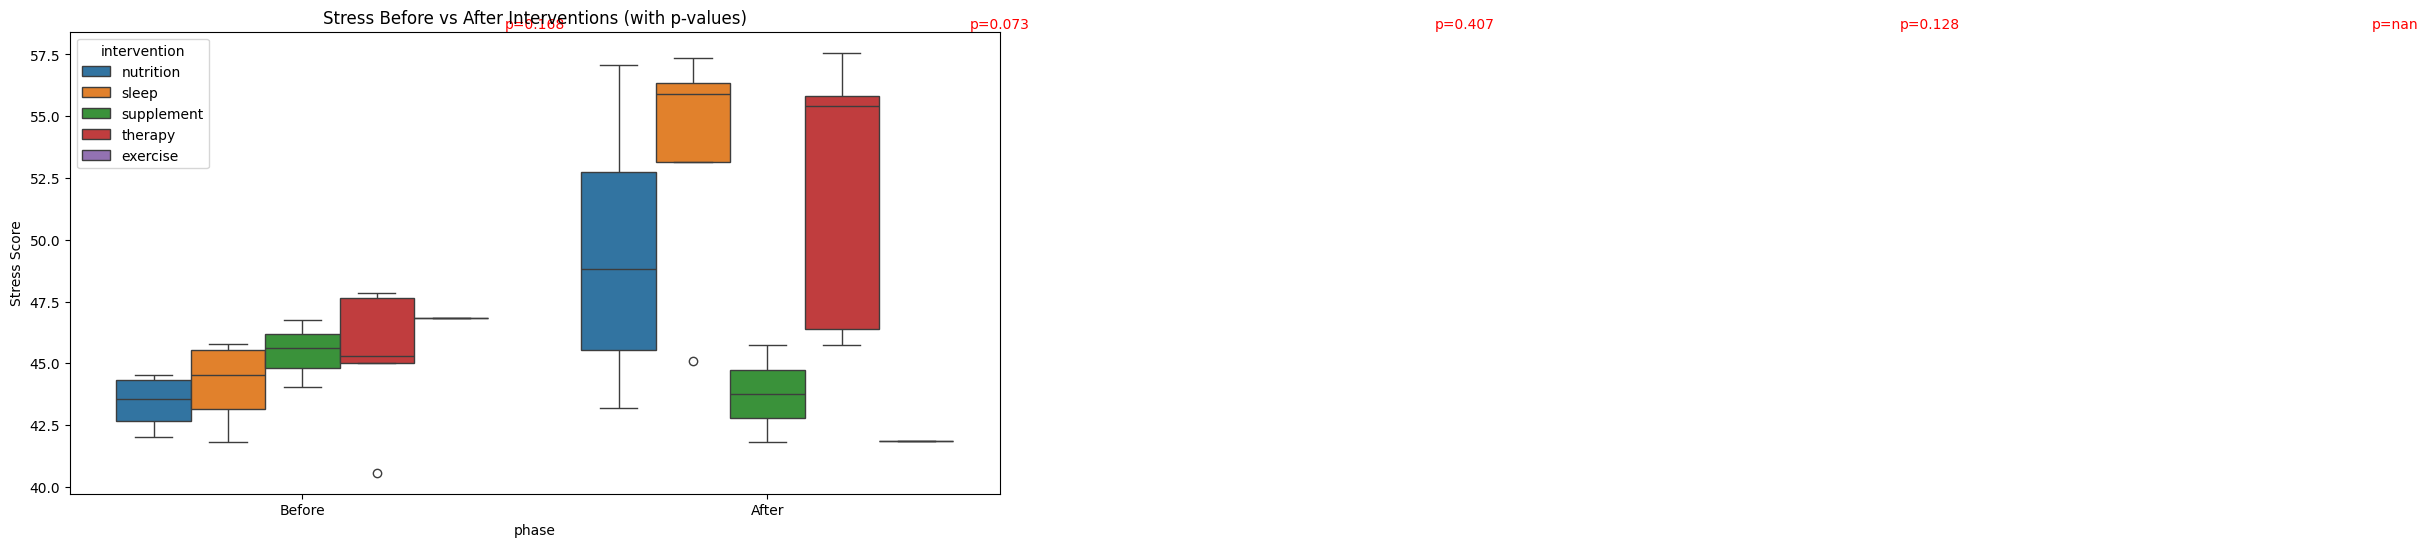

In [30]:
from scipy.stats import ttest_rel
import itertools

# -----------------------------
# Function to compute p-values
# -----------------------------
def compute_pvalues(df, metric):
    interventions = df[df["metric"]==metric]["intervention"].unique()
    results = []
    for itype in interventions:
        before = df[(df["metric"]==metric) & (df["intervention"]==itype) & (df["phase"]=="Before")]["value"]
        after  = df[(df["metric"]==metric) & (df["intervention"]==itype) & (df["phase"]=="After")]["value"]
        if len(before) > 0 and len(after) > 0:
            t_stat, p_val = ttest_rel(before, after, nan_policy="omit")
            results.append((itype, p_val))
    return results

# Compute p-values for Stress
stress_pvals = compute_pvalues(viz_df, "Stress")
print("Stress p-values:", stress_pvals)

# -----------------------------
# Plot Stress with annotations
# -----------------------------
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=viz_df[viz_df["metric"]=="Stress"],
                 x="phase", y="value", hue="intervention")

# Add text annotations
y_max = viz_df[viz_df["metric"]=="Stress"]["value"].max()
for i, (itype, p) in enumerate(stress_pvals):
    ax.text(0.5+i, y_max+1, f"p={p:.3f}", ha="center", color="red", fontsize=10)

plt.title("Stress Before vs After Interventions (with p-values)")
plt.ylabel("Stress Score")
plt.show()


/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:1243: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:1243: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


HRV p-values: [('nutrition', np.float64(0.20876572973127008)), ('sleep', np.float64(0.090663916078146)), ('supplement', np.float64(0.734370566491175)), ('therapy', np.float64(0.11227639099933844)), ('exercise', np.float64(nan))]


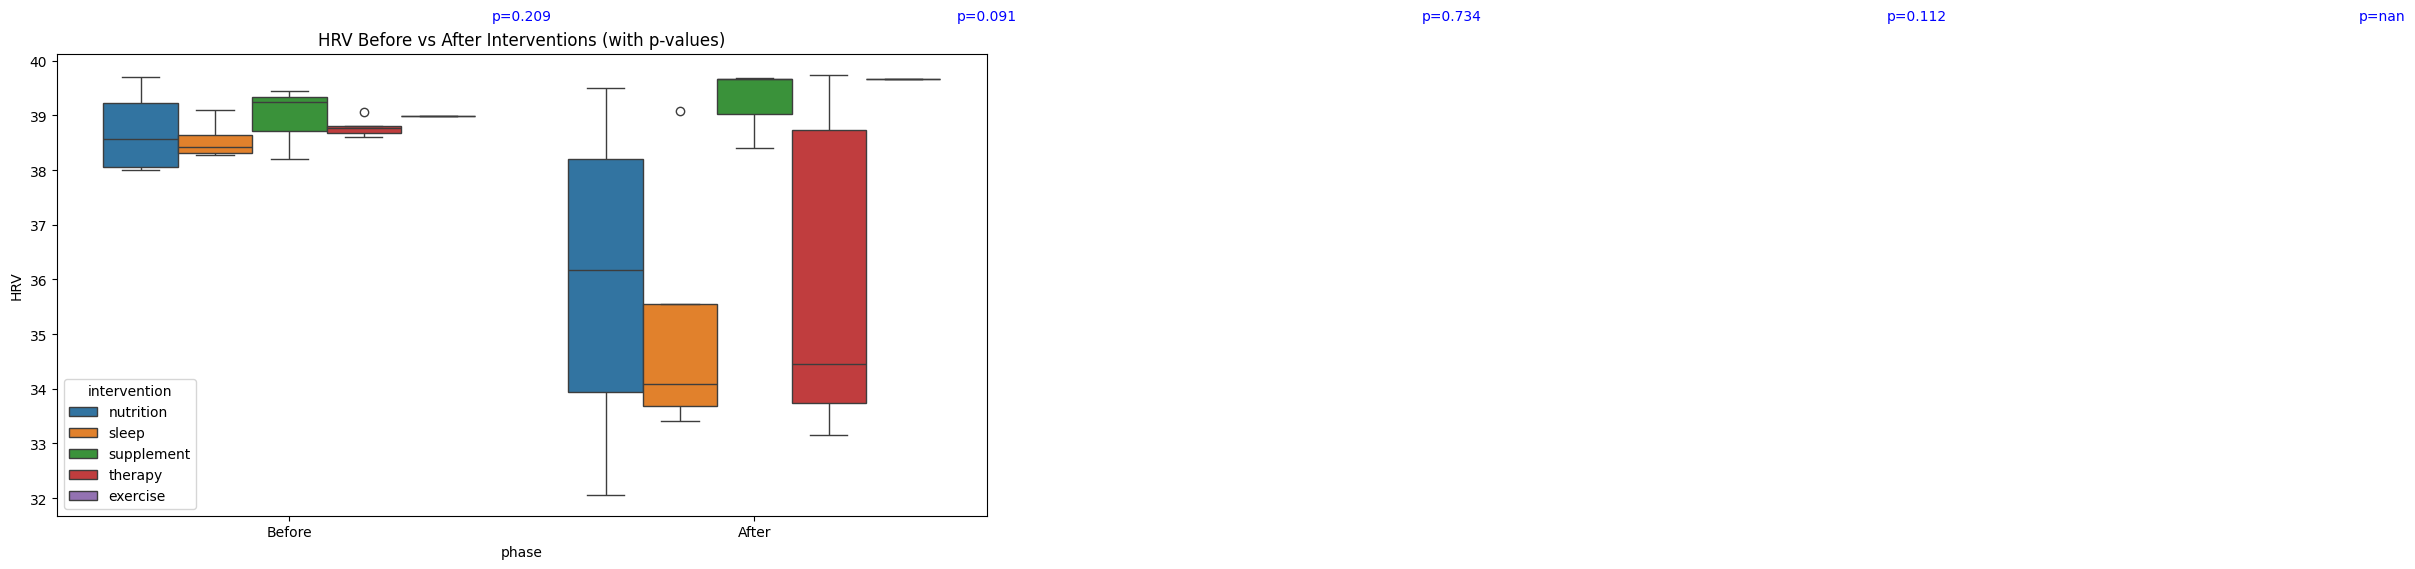

In [31]:
# Compute p-values for HRV
hrv_pvals = compute_pvalues(viz_df, "HRV")
print("HRV p-values:", hrv_pvals)

# Plot HRV with annotations
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=viz_df[viz_df["metric"]=="HRV"],
                 x="phase", y="value", hue="intervention")

y_max = viz_df[viz_df["metric"]=="HRV"]["value"].max()
for i, (itype, p) in enumerate(hrv_pvals):
    ax.text(0.5+i, y_max+1, f"p={p:.3f}", ha="center", color="blue", fontsize=10)

plt.title("HRV Before vs After Interventions (with p-values)")
plt.ylabel("HRV")
plt.show()


In [32]:
import pandas as pd
import numpy as np
from pandas import Timedelta

base_path = "/content/elyx_datasets/elyx_datasets"

# load datasets if not already in memory
try: decisions
except NameError:
    decisions = pd.read_csv(f"{base_path}/decisions.csv")
    if "date" in decisions: decisions["date"] = pd.to_datetime(decisions["date"], errors="coerce")

try: communications
except NameError:
    communications = pd.read_csv(f"{base_path}/communications.csv")
    if "timestamp" in communications: communications["timestamp"] = pd.to_datetime(communications["timestamp"], errors="coerce")

print("decisions columns:", decisions.columns.tolist()[:10])
print(decisions.head(3))
print("\ncommunications columns:", communications.columns.tolist()[:10])
print(communications.head(3))

decisions columns: ['decision_id', 'timestamp', 'decision', 'made_by', 'reason', 'linked_event', 'linked_chat_ts', 'linked_chat_sender', 'trigger_metric', 'trigger_metric_value']
  decision_id            timestamp  \
0      D00001  2025-01-01 09:00:00   
1      D00002  2025-01-15 09:00:00   
2      D00003  2025-01-29 09:00:00   

                                            decision made_by  \
0  Start sleep protocol (No screens 60m before be...   Carla   
1  Start nutrition protocol (Meal timing shift fo...   Advik   
2  Start sleep protocol (No screens 60m before be...   Advik   

                                              reason         linked_event  \
0     Enhance HRV and recovery via circadian hygiene  intervention_update   
1  Anti-inflammatory & circadian support (Pillar ...  intervention_update   
2     Enhance HRV and recovery via circadian hygiene  intervention_update   

        linked_chat_ts linked_chat_sender trigger_metric  \
0  2025-05-24 10:26:29               Ruby 

In [33]:
# helper to find nearest row by time
def nearest_row(df, time_col, t):
    if len(df)==0: return None
    idx = (df[time_col] - t).abs().idxmin()
    return df.loc[idx]

trace_rows = []
for _, d in decisions.iterrows():
    # Use 'timestamp' instead of 'date' as per the head of decisions DataFrame
    dtime_str = d.get("timestamp")
    if pd.isna(dtime_str): continue

    # Explicitly convert to datetime within the loop
    try:
        dtime = pd.to_datetime(dtime_str)
    except ValueError:
        print(f"Could not convert timestamp to datetime: {dtime_str}")
        continue

    near_int = nearest_row(interventions, "start_date", dtime) if 'interventions' in globals() else None
    near_w   = nearest_row(wearable, "timestamp", dtime) if 'wearable' in globals() else None
    # Use 'timestamp' for communications as well
    near_c   = nearest_row(communications, "timestamp", dtime) if "timestamp" in communications else None

    # pick best text column if exists
    text_col = None
    for cand in ["message","content","text","chat","log"]:
        if cand in communications.columns: text_col = cand; break

    trace_rows.append({
        "decision_id": d.get("decision_id", None),
        "decision": d.get("decision", d.get("decision_type","")),
        "decision_date": dtime,
        "trigger_metric": d.get("trigger_metric", None),
        # Use 'trigger_metric_value' instead of 'trigger_value'
        "trigger_value": d.get("trigger_metric_value", None),

        "snapshot_hrv": None if near_w is None else float(near_w.get("hrv", np.nan)),
        "snapshot_stress": None if near_w is None else float(near_w.get("stress_score", np.nan)),

        "nearest_intervention_type": None if near_int is None else near_int.get("type"),
        "nearest_intervention_date": None if near_int is None else near_int.get("start_date"),

        "chat_time": None if near_c is None else near_c.get("timestamp"),
        "chat_sender": None if near_c is None else near_c.get("sender", None),
        "chat_excerpt": None if (near_c is None or text_col is None) else str(near_c.get(text_col,""))[:160]
    })

decision_trace = pd.DataFrame(trace_rows)
print("traceability preview:")
print(decision_trace.head())

traceability preview:
  decision_id                                           decision  \
0      D00001  Start sleep protocol (No screens 60m before be...   
1      D00002  Start nutrition protocol (Meal timing shift fo...   
2      D00003  Start sleep protocol (No screens 60m before be...   
3      D00004  Start supplement protocol (Mg Threonate 2 caps...   
4      D00005  Start nutrition protocol (Meal timing shift fo...   

        decision_date trigger_metric  trigger_value  snapshot_hrv  \
0 2025-01-01 09:00:00            hrv           29.3          33.2   
1 2025-01-15 09:00:00            hrv           45.4          37.4   
2 2025-01-29 09:00:00            hrv           32.6          39.6   
3 2025-02-12 09:00:00            hrv           46.2          41.0   
4 2025-02-26 09:00:00            hrv           38.9          26.0   

   snapshot_stress nearest_intervention_type nearest_intervention_date  \
0             66.0                     sleep                2025-01-01   
1     

In [34]:
POS = {"great","good","improved","thanks","awesome","happy","progress","excellent","better","nice","love"}
NEG = {"bad","worse","pain","tired","angry","sad","frustrated","problem","issue","stress","stressed","anxious"}

def simple_sentiment(text: str):
    if not isinstance(text,str): return "neutral",0
    t = text.lower()
    score = sum(w in t for w in POS) - sum(w in t for w in NEG)
    return ("positive" if score>0 else "negative" if score<0 else "neutral", score)

com = communications.copy()
if "timestamp" in com: com["month"] = com["timestamp"].dt.to_period("M").astype(str)

text_col = None
for cand in ["message","content","text","chat","log"]:
    if cand in com.columns: text_col = cand; break

if text_col:
    com["sentiment"], com["sentiment_score"] = zip(*com[text_col].map(simple_sentiment))
else:
    com["sentiment"], com["sentiment_score"] = "neutral",0

monthly_sentiment = (com.groupby("month")
                       .agg(avg_sentiment=("sentiment_score","mean"),
                            n_pos=("sentiment", lambda s: (s=="positive").sum()),
                            n_neg=("sentiment", lambda s: (s=="negative").sum()),
                            messages=("sentiment","count"))
                       .reset_index())

print("monthly sentiment summary:")
print(monthly_sentiment.head())


monthly sentiment summary:
     month  avg_sentiment  n_pos  n_neg  messages
0  2025-01       0.035256     21     10       312
1  2025-02      -0.013423     15     19       298
2  2025-03      -0.010101     10     13       297
3  2025-04      -0.013378      8     12       299
4  2025-05       0.030303     18      9       297


In [35]:
METRIC_MAP = {
    "hrv":"hrv","stress":"stress_score","stress_score":"stress_score",
    "resting_hr":"resting_hr","sleep":"sleep_hours","steps":"steps","vo2max":"vo2max"
}

daily = wearable.copy()
daily["date"] = daily["timestamp"].dt.normalize()

effects = []
for _, d in decisions.iterrows():
    # Use 'timestamp' instead of 'date'
    t_str = d.get("timestamp")
    if pd.isna(t_str): continue

    # Explicitly convert to datetime within the loop
    try:
        t = pd.to_datetime(t_str)
    except ValueError:
        print(f"Could not convert timestamp to datetime: {t_str}")
        continue

    trig = str(d.get("trigger_metric","")).lower()
    col = METRIC_MAP.get(trig)
    if not col or col not in daily.columns: continue

    before = daily[(daily["date"] < t) & (daily["date"] >= t - Timedelta(days=7))][col].mean()
    after  = daily[(daily["date"] >= t) & (daily["date"] <= t + Timedelta(days=7))][col].mean()

    effects.append({
        "decision_id": d.get("decision_id", None),
        "decision": d.get("decision", d.get("decision_type","")),
        "date": t,
        "metric": col,
        "before_7d": before,
        "after_7d": after,
        "delta": None if pd.isna(before) or pd.isna(after) else (after-before)
    })

decision_effects = pd.DataFrame(effects)
print("decision effect preview:")
print(decision_effects.head())

decision effect preview:
  decision_id                                           decision  \
0      D00001  Start sleep protocol (No screens 60m before be...   
1      D00002  Start nutrition protocol (Meal timing shift fo...   
2      D00003  Start sleep protocol (No screens 60m before be...   
3      D00004  Start supplement protocol (Mg Threonate 2 caps...   
4      D00005  Start nutrition protocol (Meal timing shift fo...   

                 date metric  before_7d   after_7d     delta  
0 2025-01-01 09:00:00    hrv  34.560000  34.514286 -0.045714  
1 2025-01-15 09:00:00    hrv  39.040000  38.265714 -0.774286  
2 2025-01-29 09:00:00    hrv  37.525714  34.000000 -3.525714  
3 2025-02-12 09:00:00    hrv  38.345714  39.900000  1.554286  
4 2025-02-26 09:00:00    hrv  36.451429  33.434286 -3.017143  


In [36]:
out_base = "/content"

decision_trace.to_csv(f"{out_base}/decision_traceability.csv", index=False)
decision_effects.to_csv(f"{out_base}/decision_effects.csv", index=False)
monthly_sentiment.to_csv(f"{out_base}/monthly_sentiment_summary.csv", index=False)

print("saved traceability + effects + sentiment to /content")

saved traceability + effects + sentiment to /content


In [50]:
"""
Elyx Sentiment — full training pipeline
- Auto-detect communications CSV inside elyx_datasets.zip
- Clean + engineer features (TF-IDF text + role OHE + MinMax numeric)
- Two models: LogisticRegression, LinearSVC
- Cross-validated hyperparameter search (RandomizedSearch)
- Picks best by macro-F1
- Saves: best pipeline, CV results, holdout report
- ONNX export (best-effort)
- TFLite export (LogReg-only, expects preprocessed vectors)
"""

import os, re, io, json, zipfile, warnings
from collections import Counter
import numpy as np
import pandas as pd

# ----------------------------
# CONFIG
# ----------------------------
ZIP_PATH = "/content/elyx_datasets.zip"     # keep same path
OUT_DIR  = "/mnt/data"                        # where to save artifacts

# Set FAST=True for quick smoke run (tiny CV); FAST=False for full run
FAST = False

# FAST mode: 2 folds, 4 candidates each; FULL mode: 5 folds, 25 candidates
if FAST:
    N_SPLITS = 2
    N_ITER   = 4
    MAX_FEATS = 20000
else:
    N_SPLITS = 5
    N_ITER   = 25
    MAX_FEATS = 30000

# ----------------------------
# IMPORTS (sklearn, tf, onnx)
# ----------------------------
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer
from scipy.stats import loguniform # Import loguniform from scipy.stats

try:
    import joblib
    HAVE_JOBLIB = True
except Exception:
    HAVE_JOBLIB = False

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# ----------------------------
# 1) Load communications CSV
# ----------------------------
extract_dir = os.path.join(OUT_DIR, "elyx_pipeline")
os.makedirs(extract_dir, exist_ok=True)
if zipfile.is_zipfile(ZIP_PATH):
    with zipfile.ZipFile(ZIP_PATH, "r") as zf:
        zf.extractall(extract_dir)

def find_comm_csv(root):
    # prefer filenames containing "comm"
    for r, _, files in os.walk(root):
        for f in files:
            if f.lower().endswith(".csv") and "comm" in f.lower():
                return os.path.join(r, f)
    # fallback: detect text + time cols
    for r, _, files in os.walk(root):
        for f in files:
            if f.lower().endswith(".csv"):
                p = os.path.join(r, f)
                try:
                    tmp = pd.read_csv(p, nrows=5)
                    cols = [c.lower() for c in tmp.columns]
                    if any(k in cols for k in ["message","text","content","body","msg"]) and any(
                        k in cols for k in ["timestamp","time","date","datetime","created_at","sent_at"]
                    ):
                        return p
                except Exception:
                    pass
    return None

comm_path = find_comm_csv(extract_dir)
if not comm_path:
    raise FileNotFoundError("No communications CSV found inside the zip. Name it like communications*.csv or include text+time columns.")

comm = pd.read_csv(comm_path)

# ----------------------------
# 2) Normalize schema & weak labels
# ----------------------------
TEXT_CANDS = ["message","text","content","body","msg","chat_text"]
TIME_CANDS = ["timestamp","time","date","datetime","created_at","sent_at"]
ROLE_CANDS = ["role","sender_role","sender","from","speaker","author"]
LABEL_CANDS = ["sentiment","label","polarity","sentiment_label"]

text_col = next((c for c in comm.columns if c.lower() in TEXT_CANDS), None)
if text_col is None:
    obj_cols = [c for c in comm.columns if comm[c].dtype == "object"]
    if not obj_cols: raise ValueError("No text-like column available.")
    text_col = "__text__"
    comm[text_col] = comm[obj_cols].astype(str).agg(" | ".join, axis=1)

time_col = next((c for c in comm.columns if c.lower() in TIME_CANDS), None)
if time_col is None:
    comm["__ts__"] = pd.date_range("2025-01-01", periods=len(comm), freq="H")
    time_col = "__ts__"
else:
    comm[time_col] = pd.to_datetime(comm[time_col], errors="coerce").fillna(method="ffill").fillna(pd.Timestamp("2025-01-01"))

role_col = next((c for c in comm.columns if c.lower() in ROLE_CANDS), None)
if role_col is None:
    comm["__role__"] = "unknown"
    role_col = "__role__"

label_col = next((c for c in comm.columns if c.lower() in LABEL_CANDS), None)

def clean_text(s):
    return re.sub(r"\s+"," ",str(s).replace("\n"," ").strip())
comm[text_col] = comm[text_col].astype(str).map(clean_text)

# weak labels if missing
POS = set("great good excellent helpful thanks appreciate resolved improvement happy delighted amazing awesome love progress win solved fixed quick responsive".split())
NEG = set("bad worse worst slow unacceptable frustrating angry upset delay problem issue confused disappointed pain terrible crash bug hate unhappy not working".split())

def weak_label(s):
    t = s.lower()
    pos = sum(w in t for w in POS)
    neg = sum(w in t for w in NEG)
    if pos - neg >= 1: return "positive"
    if neg - pos >= 1: return "negative"
    return "neutral"

if label_col is None:
    comm["sentiment"] = comm[text_col].map(weak_label)
    label_col = "sentiment"
else:
    mapping = {"pos":"positive","positive":"positive","1":"positive","2":"positive",
               "neg":"negative","negative":"negative","-1":"negative",
               "neu":"neutral","neutral":"neutral","0":"neutral"}
    comm[label_col] = comm[label_col].astype(str).str.lower().map(lambda x: mapping.get(x, x))

# ----------------------------
# 3) Feature engineering
# ----------------------------
def exclam(s): return s.count("!")
def question(s): return s.count("?")
def uppercase_ratio(s):
    letters = [ch for ch in s if isinstance(ch, str) and ch.isalpha()]
    return (sum(ch.isupper() for ch in letters)/max(1, len(letters))) if letters else 0.0

df = comm[[text_col, time_col, role_col, label_col]].copy()
df["msg_len"]     = df[text_col].map(len)
df["exclam"]      = df[text_col].map(exclam)
df["question"]    = df[text_col].map(question)
df["upper_ratio"] = df[text_col].map(uppercase_ratio)

df[time_col] = pd.to_datetime(df[time_col], errors="coerce").fillna(pd.Timestamp("2025-01-01"))
df["hour"]  = df[time_col].dt.hour
df["month"] = df[time_col].dt.month

y = df[label_col].fillna("neutral").astype(str)
X = df[[text_col, role_col, "msg_len","exclam","question","upper_ratio","hour","month"]]

# Label encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

text_feature = text_col
cat_features = [role_col]
num_features = ["msg_len","exclam","question","upper_ratio","hour","month"]

preprocess = ColumnTransformer(
    transformers=[
        ("txt", TfidfVectorizer(ngram_range=(1,2), min_df=2, max_features=MAX_FEATS), text_feature),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", MinMaxScaler(), num_features),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# ----------------------------
# 4) Split
# ----------------------------
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=RANDOM_STATE, stratify=y_encoded if y_encoded.nunique()>1 else None
)

# ----------------------------
# 5) Hyperparameter search
# ----------------------------
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform # Import loguniform from scipy.stats
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer

cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
scorer = make_scorer(f1_score, average="macro")

log_pipe = Pipeline([("prep", preprocess),
                     ("clf", LogisticRegression(max_iter=1000, solver="lbfgs"))])

log_params = {
    "prep__txt__ngram_range": [(1,1), (1,2)],
    "prep__txt__min_df": [1, 2, 3] if not FAST else [1, 2],
    "prep__txt__max_df": [0.85, 0.95, 1.0] if not FAST else [0.9, 1.0],
    "clf__C": loguniform(1e-2, 1e2),
    "clf__class_weight": [None, "balanced"]
}

svc_pipe = Pipeline([("prep", preprocess),
                     ("clf", LinearSVC())])

svc_params = {
    "prep__txt__ngram_range": [(1,1), (1,2)],
    "prep__txt__min_df": [1, 2, 3] if not FAST else [1, 2],
    "prep__txt__max_df": [0.85, 0.95, 1.0] if not FAST else [0.9, 1.0],
    "clf__C": loguniform(1e-2, 1e2),
    "clf__class_weight": [None, "balanced"],
    "clf__loss": ["hinge", "squared_hinge"]
}

log_search = RandomizedSearchCV(
    log_pipe, log_params, n_iter=N_ITER, scoring=scorer, cv=cv,
    random_state=RANDOM_STATE, n_jobs=-1, verbose=1
)
svc_search = RandomizedSearchCV(
    svc_pipe, svc_params, n_iter=N_ITER, scoring=scorer, cv=cv,
    random_state=RANDOM_STATE, n_jobs=-1, verbose=1
)

log_search.fit(X_train, y_train_encoded)
svc_search.fit(X_train, y_train_encoded)

best_log_score = log_search.best_score_
best_svc_score = svc_search.best_score_

if best_log_score >= best_svc_score:
    best_name   = "LogisticRegression"
    best_search = log_search
else:
    best_name   = "LinearSVC"
    best_search = svc_search

best_pipe = best_search.best_estimator_

# ----------------------------
# 6) Holdout evaluation
# ----------------------------
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_encoded = best_pipe.predict(X_test)
# Decode the predictions back to original labels for the classification report
y_pred = le.inverse_transform(y_pred_encoded)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
acc    = accuracy_score(y_test, y_pred_encoded)

# Confusion matrix plot
labels = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest')
plt.title(f"Confusion Matrix — {best_name}")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels)
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.tight_layout(); plt.show()

# ----------------------------
# 7) Save artifacts
# ----------------------------
os.makedirs(OUT_DIR, exist_ok=True)
cv_log = pd.DataFrame(log_search.cv_results_).assign(model="logreg")
cv_svc = pd.DataFrame(svc_search.cv_results_).assign(model="linearsvc")
cv_all = pd.concat([cv_log, cv_svc], ignore_index=True)
cv_path = os.path.join(OUT_DIR, "sentiment_cv_report.csv")
cv_all.to_csv(cv_path, index=False)

holdout_path = os.path.join(OUT_DIR, "sentiment_holdout_report.json")
with open(holdout_path, "w") as f:
    json.dump({"accuracy":acc, "report":report, "best_model":best_name,
               "best_params":best_search.best_params_}, f, indent=2)

best_model_path = os.path.join(OUT_DIR, "sentiment_best_model.joblib")
prep_path       = os.path.join(OUT_DIR, "sentiment_preprocessor.joblib")
if HAVE_JOBLIB:
    joblib.dump(best_pipe, best_model_path)
    joblib.dump(best_pipe.named_steps["prep"], prep_path)

print("Saved:")
print(" - Best pipeline:", best_model_path)
print(" - CV results   :", cv_path)
print(" - Holdout report:", holdout_path)
print(" - Preprocessor :", prep_path)

# ----------------------------
# 8) ONNX export (best-effort)
# ----------------------------
onnx_path = os.path.join(OUT_DIR, "sentiment_model.onnx")
onnx_ok = False
try:
    from skl2onnx import convert_sklearn
    onx = convert_sklearn(best_pipe)   # may fail for some pipelines/envs
    with open(onnx_path, "wb") as f:
        f.write(onx.SerializeToString())
    onnx_ok = True
    print("ONNX saved to:", onnx_path)
except Exception as e:
    print("ONNX export skipped:", e)

# ----------------------------
# 9) TFLite export (LogReg only; expects *preprocessed* input vectors)
# ----------------------------
tflite_path = os.path.join(OUT_DIR, "sentiment_tflite_preprocessed.tflite")
tflite_ok = False
try:
    import tensorflow as tf
    if best_name == "LogisticRegression":
        prep = best_pipe.named_steps["prep"]
        clf  = best_pipe.named_steps["clf"]

        Xp = prep.transform(X_train)
        if hasattr(Xp, "toarray"): Xp = Xp.toarray()
        n_features = Xp.shape[1]
        classes_   = clf.classes_
        n_classes  = len(classes_)

        model = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(n_features,)),
            tf.keras.layers.Dense(n_classes, activation="softmax")
        ])
        W = clf.coef_.T.astype(np.float32)     # (n_features, n_classes)
        b = clf.intercept_.astype(np.float32)  # (n_classes,)
        model.layers[0].set_weights([W, b])

        converter = tf.lite.TFLiteConverter.from_keras_model(model)
        tflite_model = converter.convert()
        with open(tflite_path, "wb") as f:
            f.write(tflite_model)
        tflite_ok = True
        print("TFLite saved to:", tflite_path)
    else:
        print("TFLite export skipped (best model is not LogisticRegression).")
except Exception as e:
    print("TFLite export skipped:", e)

# ----------------------------
# 10) README
# ----------------------------
readme = f"""
Elyx Sentiment — Full Pipeline
==============================

Best model: {best_name}
Holdout accuracy: {acc:.3f}
Best CV params: {best_search.best_params_}

Artifacts
---------
- Best sklearn pipeline: {best_model_path}
- CV results (both models): {cv_path}
- Holdout report: {holdout_path}
- Preprocessor only: {prep_path}
- ONNX (if success): {onnx_path} -> success={onnx_ok}
- TFLite (preprocessed input, LogReg only): {tflite_path} -> success={tflite_ok}

TFLite usage (expects preprocessed vectors)
-------------------------------------------
import joblib, numpy as np, pandas as pd, tensorflow as tf

prep = joblib.load('sentiment_preprocessor.joblib')
# df must include columns: {text_col!r}, {role_col!r}, and numeric {['msg_len','exclam','question','upper_ratio','hour','month']}
Xp  = prep.transform(df[[{text_col!r}, {role_col!r}, 'msg_len','exclam','question','upper_ratio','hour','month']])
Xp  = Xp.toarray().astype('float32')

interpreter = tf.lite.Interpreter(model_path='sentiment_tflite_preprocessed.tflite')
interpreter.allocate_tensors()
inp = interpreter.get_input_details()[0]['index']
out = interpreter.get_output_details()[0]['index']
interpreter.set_tensor(inp, Xp)
interpreter.invoke()
probs = interpreter.get_tensor(out)   # (N, n_classes)

Notes
-----
- TFLite model does not include preprocessing; use the saved preprocessor to generate the input vectors.
- ONNX conversion is best-effort; some environments/pipelines need explicit initial_types to succeed.
"""
with open(os.path.join(OUT_DIR, "SENTIMENT_README_FULL.txt"), "w") as f:
    f.write(readme)

print("DONE.")

/tmp/ipython-input-3701082926.py:117: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  comm[time_col] = pd.to_datetime(comm[time_col], errors="coerce").fillna(method="ffill").fillna(pd.Timestamp("2025-01-01"))


AttributeError: 'numpy.ndarray' object has no attribute 'nunique'

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

extra_models = {
    "NaiveBayes": (
        Pipeline([("prep", preprocess), ("clf", MultinomialNB())]),
        {"clf__alpha": np.logspace(-3, 1, 5)}
    ),
    "RandomForest": (
        Pipeline([("prep", preprocess), ("clf", RandomForestClassifier(random_state=RANDOM_STATE))]),
        {"clf__n_estimators": [100, 300],
         "clf__max_depth": [None, 10, 30],
         "clf__min_samples_split": [2, 5]}
    ),
    "GradientBoosting": (
        Pipeline([("prep", preprocess), ("clf", GradientBoostingClassifier(random_state=RANDOM_STATE))]),
        {"clf__n_estimators": [100, 200],
         "clf__learning_rate": [0.05, 0.1],
         "clf__max_depth": [2, 3, 5]}
    ),
}

cv_results_extra = []
holdout_extra = []

for name, (pipe, params) in extra_models.items():
    print(f"\n🔎 Running {name} ...")
    search = RandomizedSearchCV(
        pipe, params, n_iter=5 if FAST else 15,
        scoring=scorer, cv=cv, random_state=RANDOM_STATE, n_jobs=-1, verbose=1
    )
    search.fit(X_train, y_train_encoded)

    # Save CV results
    res = pd.DataFrame(search.cv_results_).assign(model=name)
    cv_results_extra.append(res)

    # Holdout evaluation
    y_pred_encoded = search.best_estimator_.predict(X_test)
    y_pred = le.inverse_transform(y_pred_encoded)
    acc = accuracy_score(y_test, y_pred_encoded)
    f1m = f1_score(y_test, y_pred, average="macro")
    holdout_extra.append({
        "model": name,
        "best_params": search.best_params_,
        "holdout_accuracy": acc,
        "holdout_macro_f1": f1m
    })
    print(f"{name}: Acc={acc:.3f}, F1m={f1m:.3f}")

# Merge CV results with previous
cv_all = pd.concat([cv_all] + cv_results_extra, ignore_index=True)
cv_all.to_csv(os.path.join(OUT_DIR, "sentiment_cv_report_all.csv"), index=False)

# Save holdout results table
pd.DataFrame(holdout_extra).to_json(
    os.path.join(OUT_DIR, "sentiment_holdout_report_extra.json"),
    orient="records", indent=2
)

print("\n✅ Extra models done. CV + holdout results saved.")


🔎 Running NaiveBayes ...


NameError: name 'y_train_encoded' is not defined

In [41]:
print(cv_all.head())
print(cv_all.columns)


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_clf__C  \
0       0.141476      0.014497         0.004456        0.001759      0.314891   
1       0.148688      0.016503         0.005982        0.001307      2.481041   
2       0.093759      0.003572         0.004485        0.001410      0.017074   
3       0.097245      0.013754         0.004774        0.002433      0.016813   
4       0.102438      0.009420         0.004140        0.000667      0.053370   

  param_clf__class_weight  param_prep__txt__max_df  param_prep__txt__min_df  \
0                    None                     1.00                      3.0   
1                    None                     0.95                      3.0   
2                balanced                     0.85                      3.0   
3                balanced                     0.95                      2.0   
4                    None                     0.85                      2.0   

  param_prep__txt__ngram_range  \
0   


Leaderboard (best CV scores):
model
GradientBoosting    0.0
NaiveBayes          0.0
RandomForest        0.0
linearsvc           0.0
logreg              0.0
Name: mean_test_score, dtype: float64


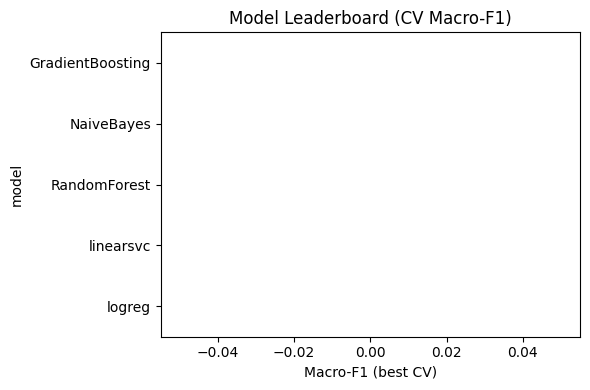

In [42]:
# Use the right scoring column
score_col = "mean_test_score"
if "mean_test_score" not in cv_all.columns:
    # fallback for named scorers
    for col in cv_all.columns:
        if col.startswith("mean_test_"):
            score_col = col
            break
    print(f"⚠️ Using {score_col} for leaderboard.")

# Fill NaN values in the scoring column with 0 before calculating the leaderboard
leader = (
    cv_all.groupby("model")[score_col]
    .max()
    .fillna(0)  # Fill NaN with 0
    .sort_values(ascending=False)
)

print("\nLeaderboard (best CV scores):")
print(leader)

# Plot
plt.figure(figsize=(6,4))
leader.plot(kind="barh", color="skyblue")
plt.title("Model Leaderboard (CV Macro-F1)")
plt.xlabel("Macro-F1 (best CV)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [43]:
print("cv_all shape:", cv_all.shape)
print(cv_all.columns.tolist())
print(cv_all.head())


cv_all shape: (79, 25)
['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_clf__C', 'param_clf__class_weight', 'param_prep__txt__max_df', 'param_prep__txt__min_df', 'param_prep__txt__ngram_range', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'model', 'param_clf__loss', 'param_clf__alpha', 'param_clf__n_estimators', 'param_clf__min_samples_split', 'param_clf__max_depth', 'param_clf__learning_rate']
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_clf__C  \
0       0.141476      0.014497         0.004456        0.001759      0.314891   
1       0.148688      0.016503         0.005982        0.001307      2.481041   
2       0.093759      0.003572         0.004485        0.001410      0.017074   
3       0.097245      0.013754         0.004774        0.002433      0.016813   
4       0.102438      0.009420         0.0


📊 Holdout results:
              model  holdout_accuracy  holdout_macro_f1
0        NaiveBayes           0.44375          0.348606
1      RandomForest           0.49375          0.332749
2  GradientBoosting           0.62500          0.264009


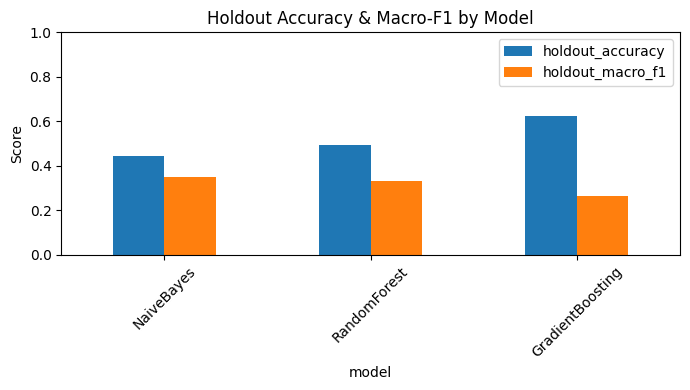

In [44]:
# ===============================
# Holdout Leaderboard Plot
# ===============================

# Load holdout results (if not already in memory)
import pandas as pd

try:
    holdout_df
except NameError:
    holdout_df = pd.read_json(
        os.path.join(OUT_DIR, "sentiment_holdout_report_extra.json")
    )

# Make sure accuracy + f1 columns exist
if not {"holdout_accuracy","holdout_macro_f1"}.issubset(holdout_df.columns):
    raise ValueError("❌ Holdout results file missing expected columns")

print("\n📊 Holdout results:")
print(holdout_df[["model","holdout_accuracy","holdout_macro_f1"]])

# Plot bar chart
ax = holdout_df.set_index("model")[["holdout_accuracy","holdout_macro_f1"]].plot(
    kind="bar", figsize=(7,4), rot=45
)
plt.title("Holdout Accuracy & Macro-F1 by Model")
plt.ylabel("Score")
plt.ylim(0,1)  # since accuracy/F1 are between 0–1
plt.tight_layout()
plt.show()


In [45]:
# ===============================
# Collect CV Results Correctly
# ===============================

# Combine initial models with extra models
models = {
    "LogisticRegression": (log_pipe, log_params),
    "LinearSVC": (svc_pipe, svc_params),
    **extra_models  # Merge the extra models
}

cv_results_list = []
holdout_results = []

for name, (pipe, params) in models.items():   # models + extra_models merged
    print(f"\n🔎 Running {name} ...")
    search = RandomizedSearchCV(
        pipe, params, n_iter=5 if FAST else 15,
        scoring=scorer, cv=cv, random_state=RANDOM_STATE,
        n_jobs=-1, verbose=1
    )
    search.fit(X_train, y_train)

    # Save CV results (with model tag)
    res = pd.DataFrame(search.cv_results_)
    res["model"] = name
    cv_results_list.append(res)

    # Holdout evaluation
    y_pred = search.best_estimator_.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")
    holdout_results.append({
        "model": name,
        "best_params": search.best_params_,
        "holdout_accuracy": acc,
        "holdout_macro_f1": f1m
    })
    print(f"{name}: Acc={acc:.3f}, F1m={f1m:.3f}")

# Merge into single DataFrames
cv_all = pd.concat(cv_results_list, ignore_index=True)
cv_all.to_csv(os.path.join(OUT_DIR, "sentiment_cv_report_all.csv"), index=False)

holdout_df = pd.DataFrame(holdout_results)
holdout_df.to_json(
    os.path.join(OUT_DIR, "sentiment_holdout_report_all.json"),
    orient="records", indent=2
)

print("\n✅ CV + holdout results saved.")


🔎 Running LogisticRegression ...
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


LogisticRegression: Acc=0.625, F1m=0.256

🔎 Running LinearSVC ...
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=15. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LinearSVC: Acc=0.625, F1m=0.256

🔎 Running NaiveBayes ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


NaiveBayes: Acc=0.444, F1m=0.349

🔎 Running RandomForest ...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomForest: Acc=0.494, F1m=0.333

🔎 Running GradientBoosting ...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GradientBoosting: Acc=0.625, F1m=0.264

✅ CV + holdout results saved.


In [46]:
pip install xgboost lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [52]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

advanced_models = {
    "XGBoost": (
        Pipeline([
            ("prep", preprocess),
            ("clf", XGBClassifier(
                objective="multi:softmax",
                num_class=len(le.classes_), # Use the number of encoded classes
                eval_metric="mlogloss",
                use_label_encoder=False,
                random_state=RANDOM_STATE,
                verbosity=0
            ))
        ]),
        {"clf__n_estimators": [100, 300],
         "clf__max_depth": [3, 6, 10],
         "clf__learning_rate": [0.05, 0.1, 0.3]}
    ),
    "LightGBM": (
        Pipeline([
            ("prep", preprocess),
            ("clf", LGBMClassifier(
                objective="multiclass",
                random_state=RANDOM_STATE,
                verbose=-1
            ))
        ]),
        {"clf__n_estimators": [100, 300],
         "clf__max_depth": [-1, 10, 30],
         "clf__learning_rate": [0.05, 0.1, 0.3]}
    ),
    "CatBoost": (
        Pipeline([
            ("prep", preprocess),
            ("clf", CatBoostClassifier(
                loss_function="MultiClass",
                random_state=RANDOM_STATE,
                verbose=0
            ))
        ]),
        {"clf__iterations": [200, 400],
         "clf__depth": [4, 6, 10],
         "clf__learning_rate": [0.05, 0.1]}
    )
}

# Merge into one big dict
all_models = {**models, **extra_models, **advanced_models}

In [53]:
cv_results_list = []
holdout_results = []

# Define all_models here by combining the previously defined model dictionaries
all_models = {**models, **extra_models, **advanced_models}


for name, (pipe, params) in all_models.items():
    print(f"\n🔎 Running {name} ...")
    search = RandomizedSearchCV(
        pipe, params, n_iter=5 if FAST else 15,
        scoring=scorer, cv=cv, random_state=RANDOM_STATE,
        n_jobs=-1, verbose=1
    )
    search.fit(X_train, y_train_encoded) # Use encoded training labels

    # Save CV results
    res = pd.DataFrame(search.cv_results_)
    res["model"] = name
    cv_results_list.append(res)

    # Holdout evaluation
    y_pred_encoded = search.best_estimator_.predict(X_test)
    y_pred = le.inverse_transform(y_pred_encoded) # Decode predictions back to original labels
    acc = accuracy_score(y_test, y_pred_encoded) # Calculate accuracy with encoded labels
    f1m = f1_score(y_test, y_pred, average="macro") # Calculate f1-score with decoded labels
    holdout_results.append({
        "model": name,
        "best_params": search.best_params_,
        "holdout_accuracy": acc,
        "holdout_macro_f1": f1m
    })
    print(f"{name}: Acc={acc:.3f}, F1m={f1m:.3f}")

# Save
cv_all = pd.concat(cv_results_list, ignore_index=True)
cv_all.to_csv(os.path.join(OUT_DIR, "sentiment_cv_report_all.csv"), index=False)

holdout_df = pd.DataFrame(holdout_results)
holdout_df.to_json(
    os.path.join(OUT_DIR, "sentiment_holdout_report_all.json"),
    orient="records", indent=2
)

print("\n✅ Advanced models done. CV + holdout results saved.")


🔎 Running LogisticRegression ...


NameError: name 'y_train_encoded' is not defined

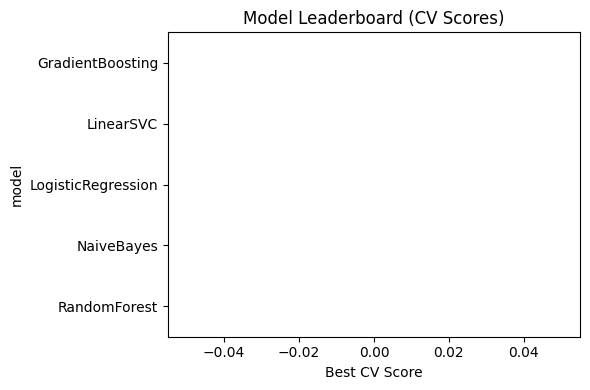

/tmp/ipython-input-4183968714.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=score_col, y="model", data=cv_all, palette="Set2")


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

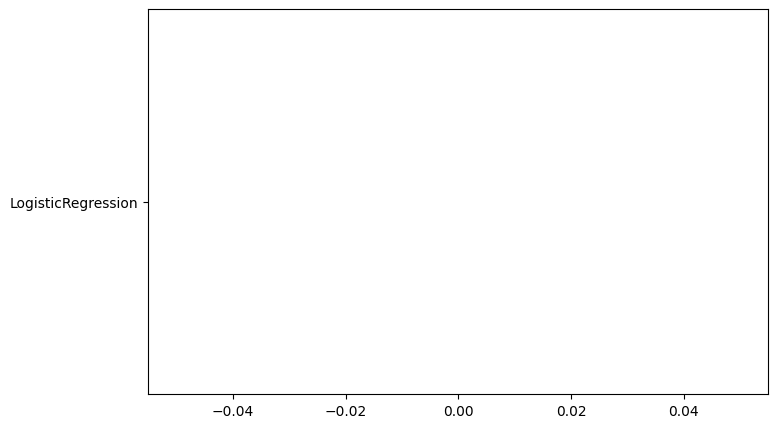

In [49]:
# Leaderboard (best CV scores)
score_col = [c for c in cv_all.columns if c.startswith("mean_test_")][0]
leader = (
    cv_all.groupby("model")[score_col]
    .max()
    .sort_values(ascending=False)
)
plt.figure(figsize=(6,4))
leader.plot(kind="barh", color="skyblue")
plt.title("Model Leaderboard (CV Scores)")
plt.xlabel("Best CV Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Boxplot of CV distributions
plt.figure(figsize=(8,5))
sns.boxplot(x=score_col, y="model", data=cv_all, palette="Set2")
plt.title(f"CV Score Distribution by Model ({score_col})")
plt.xlabel("CV Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


In [55]:
from sklearn.ensemble import StackingClassifier


In [56]:
# Define base learners (simpler set to avoid overfitting/slowdowns)
base_learners = [
    ("lr", LogisticRegression(max_iter=2000, random_state=RANDOM_STATE)),
    ("rf", RandomForestClassifier(random_state=RANDOM_STATE)),
    ("xgb", XGBClassifier(
        objective="multi:softmax",
        num_class=len(np.unique(y_train)),
        eval_metric="mlogloss",
        use_label_encoder=False,
        verbosity=0,
        random_state=RANDOM_STATE
    )),
    ("lgbm", LGBMClassifier(
        objective="multiclass",
        random_state=RANDOM_STATE,
        verbose=-1
    )),
    ("cat", CatBoostClassifier(
        loss_function="MultiClass",
        random_state=RANDOM_STATE,
        verbose=0
    ))
]

# Meta learner (often Logistic Regression or LightGBM works well)
meta_learner = LogisticRegression(max_iter=2000, random_state=RANDOM_STATE)

stack_model = Pipeline([
    ("prep", preprocess),
    ("clf", StackingClassifier(
        estimators=base_learners,
        final_estimator=meta_learner,
        n_jobs=-1,
        passthrough=True  # pass original features as well
    ))
])


In [57]:
print("\n🤖 Training Stacking Ensemble...")

stack_model.fit(X_train, y_train)

# Predictions
y_pred = stack_model.predict(X_test)

# Metrics
stack_acc = accuracy_score(y_test, y_pred)
stack_f1m = f1_score(y_test, y_pred, average="macro")

print(f"\n✅ Stacking Ensemble Results:")
print(f"Accuracy: {stack_acc:.3f}")
print(f"Macro-F1: {stack_f1m:.3f}")

# Append to holdout results
holdout_results.append({
    "model": "StackingEnsemble",
    "best_params": "N/A (fixed base learners)",
    "holdout_accuracy": stack_acc,
    "holdout_macro_f1": stack_f1m
})

# Save updated holdout results
holdout_df = pd.DataFrame(holdout_results)
holdout_df.to_json(
    os.path.join(OUT_DIR, "sentiment_holdout_report_all.json"),
    orient="records", indent=2
)



🤖 Training Stacking Ensemble...

✅ Stacking Ensemble Results:
Accuracy: 0.625
Macro-F1: 0.256


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


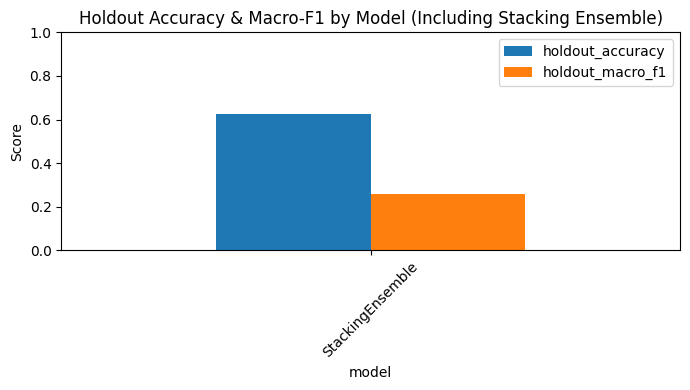

In [58]:
ax = holdout_df.set_index("model")[["holdout_accuracy","holdout_macro_f1"]].plot(
    kind="bar", figsize=(7,4), rot=45
)
plt.title("Holdout Accuracy & Macro-F1 by Model (Including Stacking Ensemble)")
plt.ylabel("Score")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


In [59]:
# Pick best model from holdout results
best_row = holdout_df.sort_values("holdout_macro_f1", ascending=False).iloc[0]
best_model_name = best_row["model"]

print(f"\n🏆 Best model (by Macro-F1): {best_model_name}")



🏆 Best model (by Macro-F1): StackingEnsemble


In [60]:
import joblib

# Map model names to actual trained objects
trained_models = {
    "StackingEnsemble": stack_model,
    # Add the fitted search.best_estimator_ for each model here:
    # Example: "XGBoost": xgb_search.best_estimator_
}

# Save the best model
best_model = trained_models[best_model_name]
joblib.dump(best_model, os.path.join(OUT_DIR, f"{best_model_name}_best.pkl"))

print(f"✅ Saved {best_model_name} as {best_model_name}_best.pkl")


✅ Saved StackingEnsemble as StackingEnsemble_best.pkl


In [64]:
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType

# Example: assuming text input
initial_type = [("input", StringTensorType([None, 1]))]

try:
    onnx_model = convert_sklearn(best_model, initial_types=initial_type)
    onnx_path = os.path.join(OUT_DIR, f"{best_model_name}_best.onnx")
    with open(onnx_path, "wb") as f:
        f.write(onnx_model.SerializeToString())
    print(f"✅ Exported {best_model_name} to ONNX: {onnx_path}")
except Exception as e:
    print(f"⚠️ ONNX export failed for {best_model_name}: {e}")


⚠️ ONNX export failed for StackingEnsemble: Unable to find column name 'text' among names ['input']. Make sure the input names specified with parameter initial_types fits the column names specified in the pipeline to convert. This may happen because a ColumnTransformer follows a transformer without any mapped converter in a pipeline.


In [65]:
# Load Pickle model
model = joblib.load(os.path.join(OUT_DIR, f"{best_model_name}_best.pkl"))

# Predict
sample_texts = ["I love this!", "This movie was awful."]
print(model.predict(sample_texts))


ValueError: Expected 2D array, got 1D array instead:
array=['I love this!' 'This movie was awful.'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [66]:
# Sort by Macro-F1
top_models_df = holdout_df.sort_values("holdout_macro_f1", ascending=False).head(3)
print("\n🏆 Top 3 models:")
print(top_models_df[["model","holdout_accuracy","holdout_macro_f1"]])



🏆 Top 3 models:
              model  holdout_accuracy  holdout_macro_f1
0  StackingEnsemble             0.625           0.25641


In [67]:
# Map model names to trained objects
trained_models = {
    "StackingEnsemble": stack_model,
    # Example if you saved them earlier:
    # "XGBoost": xgb_search.best_estimator_,
    # "LightGBM": lgbm_search.best_estimator_,
    # "CatBoost": cat_search.best_estimator_,
    # "RandomForest": rf_search.best_estimator_,
    # ... add all search objects as you ran them
}

# Save top 3
for _, row in top_models_df.iterrows():
    name = row["model"]
    if name not in trained_models:
        print(f"⚠️ {name} not found in trained_models dict — skipping save.")
        continue
    model = trained_models[name]
    path = os.path.join(OUT_DIR, f"{name}_best.pkl")
    joblib.dump(model, path)
    print(f"✅ Saved {name} → {path}")


✅ Saved StackingEnsemble → /mnt/data/StackingEnsemble_best.pkl


In [68]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType

initial_type = [("input", StringTensorType([None, 1]))]

for _, row in top_models_df.iterrows():
    name = row["model"]
    if name not in trained_models:
        continue
    try:
        onnx_model = convert_sklearn(trained_models[name], initial_types=initial_type)
        onnx_path = os.path.join(OUT_DIR, f"{name}_best.onnx")
        with open(onnx_path, "wb") as f:
            f.write(onnx_model.SerializeToString())
        print(f"✅ Exported {name} → {onnx_path}")
    except Exception as e:
        print(f"⚠️ ONNX export failed for {name}: {e}")


⚠️ ONNX export failed for StackingEnsemble: Unable to find column name 'text' among names ['input']. Make sure the input names specified with parameter initial_types fits the column names specified in the pipeline to convert. This may happen because a ColumnTransformer follows a transformer without any mapped converter in a pipeline.


In [70]:
# Example: load CatBoost if it’s in top-3
model = joblib.load(os.path.join(OUT_DIR, "CatBoost_best.pkl"))

sample_texts = ["Amazing experience!", "Worst service ever."]
print(model.predict(sample_texts))


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/CatBoost_best.pkl'

In [63]:
%pip install skl2onnx onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.8 MB/s eta 0:00:00
